In [51]:
import os
import sys
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression 
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.patches import Rectangle
from helpers import Function_Detect_APs, Function_CutAPs
from scipy.stats import pearsonr


In [2]:
fname = 'data_bio482.pkl'
data_df = pd.read_pickle(fname)

In [72]:
#df = data_df
display(data_df)

Cell_APThreshold_Slope Cell_Anatomy  Cell_Counter  Cell_Depth  Cell_ID   
0                      10.0         L2/3           1.0       229.0  SC901_1  \
1                      10.0         L2/3           1.0       229.0  SC901_1   
2                      10.0         L2/3           1.0       229.0  SC901_1   
3                      10.0         L2/3           1.0       229.0  SC901_1   
4                      10.0         L2/3           1.0       229.0  SC901_1   
..                      ...          ...           ...         ...      ...   
826                    20.0          nan           1.0       196.0  AP068_1   
827                    20.0          nan           1.0       196.0  AP068_1   
828                    20.0          nan           1.0       196.0  AP068_1   
829                    20.0          nan           1.0       196.0  AP068_1   
830                    20.0          nan           1.0       196.0  AP068_1   

    Cell_Layer Cell_TargetedBrainArea Cell_Type Cell_tdTomatoExpressing   
0         L2/3                     C2       EXC                   False  \
1         L2/3                     C2       EXC                   False   
2         L2/3                     C2       EXC                   False   
3         L2/3                     C2       EXC                   False   
4         L2/3                     C2       EXC                   False   
..         ...                    ...       ...                     ...   
826       L2/3                     C2       SST                    True   
827       L2/3                     C2       SST                    True   
828       L2/3                     C2       SST                    True   
829       L2/3                     C2       SST                    True   
830       L2/3                     C2       SST                    True   

     Mouse_DateOfBirth  ... Sweep_Counter   
0                  NaN  ...           1.0  \
1                  NaN  ...           2.0   
2                  NaN  ...           3.0   
3                  NaN  ...           4.0   
4                  NaN  ...           5.0   
..                 ...  ...           ...   
826             2015.0  ...          23.0   
827             2015.0  ...          24.0   
828             2015.0  ...          25.0   
829             2015.0  ...          26.0   
830             2015.0  ...          27.0   

                               Sweep_MembranePotential   
0    [-0.044009375, -0.044028125, -0.0439875, -0.04...  \
1    [-0.046275, -0.04629375, -0.046259375, -0.0462...   
2    [-0.041896875, -0.0419125, -0.041909375, -0.04...   
3    [-0.04655625, -0.0465875, -0.046575, -0.046596...   
4    [-0.047296875, -0.047284375, -0.047265625, -0....   
..                                                 ...   
826  [-0.059725001, -0.0597375, -0.059731249, -0.05...   
827  [-0.058984376, -0.058984376, -0.058990624, -0....   
828  [-0.053018749, -0.05298125, -0.05300625, -0.05...   
829  [-0.049796876, -0.049843751, -0.049878124, -0....   
830  [-0.054671876, -0.054706249, -0.054737501, -0....   

    Sweep_MembranePotential_SamplingRate   
0                                20000.0  \
1                                20000.0   
2                                20000.0   
3                                20000.0   
4                                20000.0   
..                                   ...   
826                              20000.0   
827                              20000.0   
828                              20000.0   
829                              20000.0   
830                              20000.0   

                             Sweep_PassiveContactTimes   
0    [[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...  \
1    [[15.274999999999999, 15.375], [16.247, 16.643...   
2    [[4.347000000000001, 7.0390000000000015], [8.2...   
3                                                  nan   
4    [[4.411000000000001, 4.4809999999999945], [5.2...   
..                                      

In [3]:
print(data_df.columns)
table = data_df.values
active_touch_df = data_df[data_df['Sweep_Type']=='active touch'] 
df = active_touch_df

Index(['Cell_APThreshold_Slope', 'Cell_Anatomy', 'Cell_Counter', 'Cell_Depth',
       'Cell_ID', 'Cell_Layer', 'Cell_TargetedBrainArea', 'Cell_Type',
       'Cell_tdTomatoExpressing', 'Mouse_DateOfBirth', 'Mouse_Genotype',
       'Mouse_Name', 'Mouse_Sex', 'Sweep_ActiveContactTimes', 'Sweep_Counter',
       'Sweep_MembranePotential', 'Sweep_MembranePotential_SamplingRate',
       'Sweep_PassiveContactTimes', 'Sweep_QuietTimes', 'Sweep_StartTime',
       'Sweep_Type', 'Sweep_WhiskerAngle', 'Sweep_WhiskerAngle_SamplingRate',
       'Sweep_WhiskingTimes'],
      dtype='object')


In [87]:
display(df)

Cell_APThreshold_Slope Cell_Anatomy  Cell_Counter  Cell_Depth  Cell_ID   
0                      10.0         L2/3           1.0       229.0  SC901_1  \
1                      10.0         L2/3           1.0       229.0  SC901_1   
3                      10.0         L2/3           1.0       229.0  SC901_1   
4                      10.0         L2/3           1.0       229.0  SC901_1   
5                      10.0         L2/3           1.0       229.0  SC901_1   
..                      ...          ...           ...         ...      ...   
620                    15.0           L4           2.0       460.0  TK539_2   
621                    15.0           L4           2.0       460.0  TK539_2   
623                    10.0           L4           1.0       432.0  TK545_1   
625                    25.0           L4           2.0       390.0  TK545_2   
626                    25.0           L4           2.0       390.0  TK545_2   

    Cell_Layer Cell_TargetedBrainArea Cell_Type Cell_tdTomatoExpressing   
0         L2/3                     C2       EXC                   False  \
1         L2/3                     C2       EXC                   False   
3         L2/3                     C2       EXC                   False   
4         L2/3                     C2       EXC                   False   
5         L2/3                     C2       EXC                   False   
..         ...                    ...       ...                     ...   
620         L4                     C2       EXC                    True   
621         L4                     C2       EXC                    True   
623         L4                     C2       EXC                    True   
625         L4                     C2       EXC                    True   
626         L4                     C2       EXC                    True   

     Mouse_DateOfBirth  ... Sweep_Counter   
0                  NaN  ...           1.0  \
1                  NaN  ...           2.0   
3                  NaN  ...           4.0   
4                  NaN  ...           5.0   
5                  NaN  ...           6.0   
..                 ...  ...           ...   
620             2017.0  ...           1.0   
621             2017.0  ...           2.0   
623             2016.0  ...           1.0   
625             2016.0  ...           1.0   
626             2016.0  ...           2.0   

                               Sweep_MembranePotential   
0    [-0.044009375, -0.044028125, -0.0439875, -0.04...  \
1    [-0.046275, -0.04629375, -0.046259375, -0.0462...   
3    [-0.04655625, -0.0465875, -0.046575, -0.046596...   
4    [-0.047296875, -0.047284375, -0.047265625, -0....   
5    [-0.040259375, -0.040284375, -0.040284375, -0....   
..                                                 ...   
620  [-0.06493165939018428, -0.06495139106057463, -...   
621  [-0.059617267734583854, -0.05954162980331142, ...   
623  [-0.05053415164553155, -0.05047824550450753, -...   
625  [-0.07429106450681139, -0.07431737349338013, -...   
626  [-0.053960870970394315, -0.05396744817014917, ...   

    Sweep_MembranePotential_SamplingRate   
0                                20000.0  \
1                                20000.0   
3                                20000.0   
4                                20000.0   
5                                20000.0   
..                                   ...   
620                              20000.0   
621                              20000.0   
623                              20000.0   
625                              20000.0   
626                              20000.0   

                             Sweep_PassiveContactTimes   
0    [[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...  \
1    [[15.274999999999999, 15.375], [16.247, 16.643...   
3                                                  nan   
4    [[4.411000000000001, 4.4809999999999945], [5.2...   
5    [[1.992999999999995, 2.272999999999996], [9.82...   
..                                      

In [75]:
table.shape
# temps longueur du vecteur/ sampling rate

(831, 24)

In [76]:
## interspike interval (average them) with the magnetude 
# Cell_Type, Sweep_WhiskerAngle, Sweep_WhiskerAngle_SamplingRate, Sweep_WhiskingTimes :

In [138]:
row_to_print = df.iloc[40]  # Assuming Python indexing (0-based index)

# Printing all information about the 40th row
print(row_to_print)


Cell_APThreshold_Slope                                                               10.0
Cell_Anatomy                                                                         L2/3
Cell_Counter                                                                          1.0
Cell_Depth                                                                          225.0
Cell_ID                                                                           SC911_1
Cell_Layer                                                                           L2/3
Cell_TargetedBrainArea                                                                 C2
Cell_Type                                                                             EXC
Cell_tdTomatoExpressing                                                             False
Mouse_DateOfBirth                                                                     NaN
Mouse_Genotype                                                                    C57Bl6j
Mouse_Name

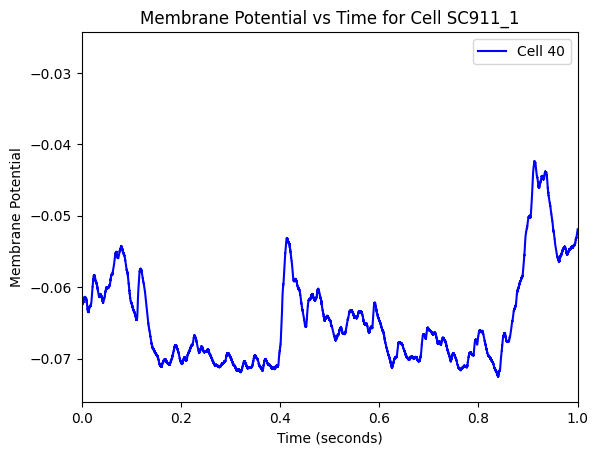

In [139]:
import pandas as pd
import matplotlib.pyplot as plt

cell_nb = 40
cell_considered = 'SC901_1'


# Assuming your DataFrame has the columns 'Sweep_MembranePotential' and 'Sweep_MembranePotential_SamplingRate'
# Replace these column names with the actual column names in your DataFrame
membrane_potential_column = 'Sweep_MembranePotential'
sampling_rate_column = 'Sweep_MembranePotential_SamplingRate'

# Choose the row you want to plot (e.g., first row with index 0)
selected_row = df.iloc[cell_nb]

# Extract membrane potential array and sampling rate for the selected row
membrane_potential = selected_row[membrane_potential_column]
sampling_rate = selected_row[sampling_rate_column]

# Calculate the time points for the x-axis
time_points = [i / sampling_rate for i in range(len(membrane_potential))]

# Plot the membrane potential
plt.plot(time_points, membrane_potential, label=f'Cell {cell_nb}', color = 'blue')

plt.xlim(0, 1)


# Customize your plot as needed (labels, title, legend, etc.)
plt.xlabel('Time (seconds)')
plt.ylabel('Membrane Potential')
plt.title('Membrane Potential vs Time for Cell SC911_1')
plt.legend()
plt.show()


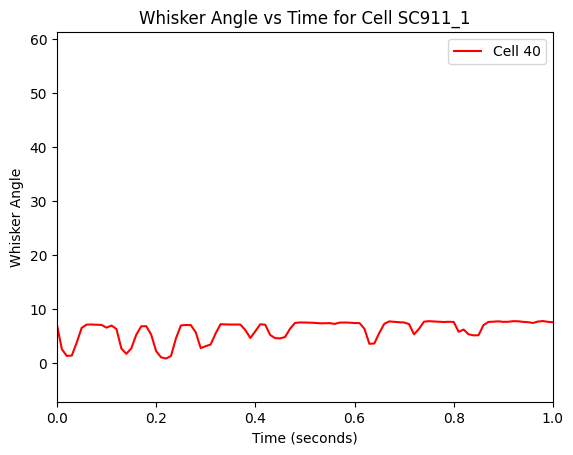

In [140]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming your table is stored in a DataFrame named df
# Replace 'YourDataFrame.csv' with the actual file path or DataFrame variable
# df = pd.read_csv('YourDataFrame.csv')

# Assuming your DataFrame has the columns 'Sweep_WhiskerAngle', 'Sweep_WhiskerAngle_SamplingRate', and 'Sweep_ActiveContactTimes'
# Replace these column names with the actual column names in your DataFrame
whisker_angle_column = 'Sweep_WhiskerAngle'
whisker_sampling_rate_column = 'Sweep_WhiskerAngle_SamplingRate'
active_contact_times_column = 'Sweep_ActiveContactTimes'

# Choose the row you want to plot (e.g., cell number 20)
selected_row = df.iloc[cell_nb]

# Extract whisker angle array, sampling rate, and active contact times
whisker_angle = selected_row[whisker_angle_column]
whisker_sampling_rate = selected_row[whisker_sampling_rate_column]
active_contact_times = selected_row[active_contact_times_column]

# Calculate the time points for the x-axis
time_points_w = [i / whisker_sampling_rate for i in range(len(whisker_angle))]

# Plot the whisker angle
plt.plot(time_points_w, whisker_angle, label=f'Cell {cell_nb}', color='red')

# Set x-axis limits between 0 and 1 seconds
plt.xlim(0, 1)
#plt.ylim(0, 5)


# Draw vertical lines at active contact times
#for time_point in active_contact_times:
#    plt.axvline(x=time_point, color='green', linestyle='--', label='Active Contact Time')

# Customize your plot as needed (labels, title, legend, etc.)
plt.xlabel('Time (seconds)')
plt.ylabel('Whisker Angle')
plt.title('Whisker Angle vs Time for Cell SC911_1')
plt.legend()
plt.show()


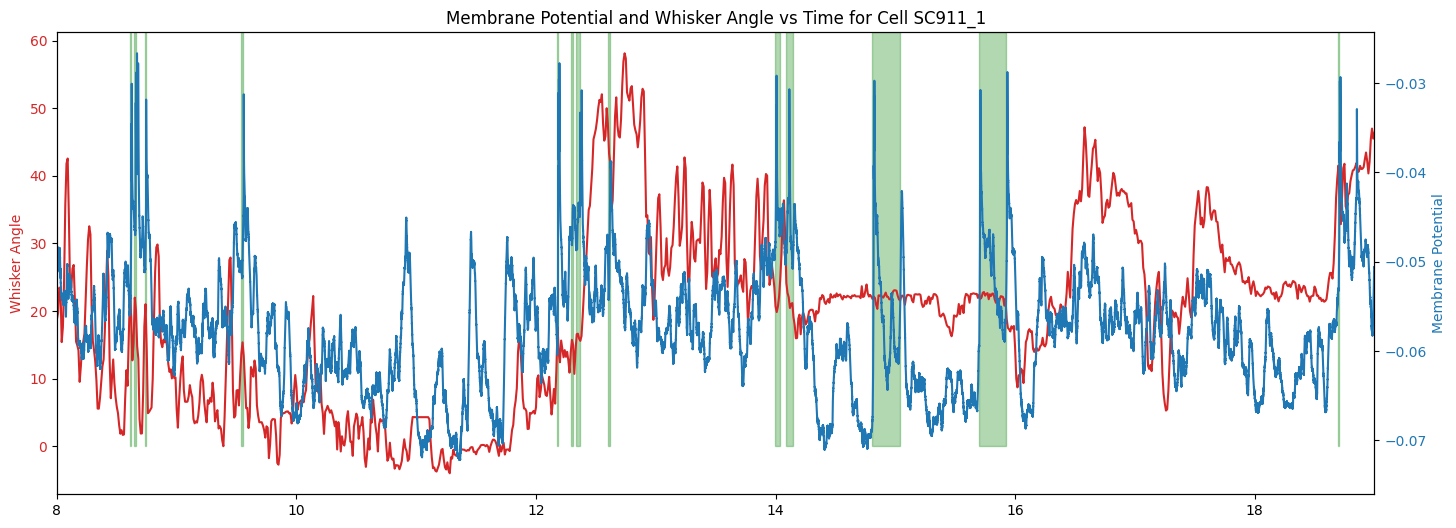

In [141]:
## Plot them both in same plot :

# Plot the membrane potential on the primary y-axis
fig, ax1 = plt.subplots(figsize=(17, 6))


color = 'tab:red'
ax1.set_ylabel('Whisker Angle', color=color)
ax1.plot(time_points_w, whisker_angle, label='Whisker Angle', color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_xlabel('Time (seconds)')
ax2.set_ylabel('Membrane Potential', color=color)
ax2.plot(time_points, membrane_potential, label='Membrane Potential', color=color)
ax2.tick_params(axis='y', labelcolor=color)

# Draw longer boxes representing active contact time intervals
for interval in active_contact_times:
    start_time, end_time = interval
    height = ax1.get_ylim()[1]  # Height is dynamically calculated based on y-axis limit
    rect = Rectangle((start_time, 0), end_time - start_time, height, linewidth=1, edgecolor='green', facecolor='green', alpha=0.3)
    ax1.add_patch(rect)



# Customize your plot as needed (title, legends, etc.)
plt.title('Membrane Potential and Whisker Angle vs Time for Cell SC911_1')

#plt.xlim(0, 1)
plt.xlim(8, 19)


# Show the plot
plt.show()

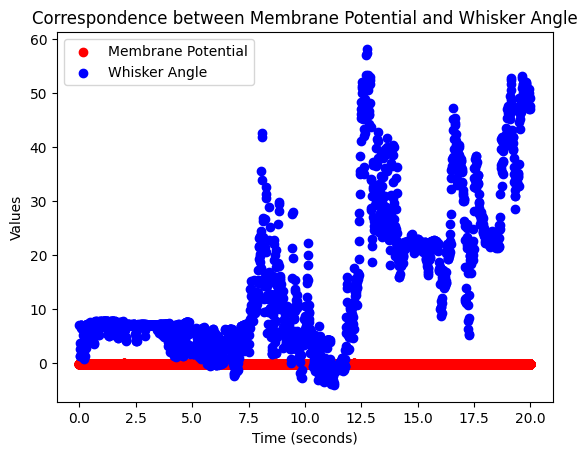

In [7]:
# Create a scatter plot
plt.scatter(time_points, membrane_potential, label='Membrane Potential', color='red')
plt.scatter(time_points_w, whisker_angle, label='Whisker Angle', color='blue')

# Customize your plot as needed (labels, title, legends, etc.)
plt.xlabel('Time (seconds)')
plt.ylabel('Values')
plt.title('Correspondence between Membrane Potential and Whisker Angle')
plt.legend()
plt.show()

In [7]:
Active_contact_sweep_column = 'Sweep_ActiveContactTimes'

# Choose the row you want to plot (e.g., cell number 20)
selected_row = df.iloc[cell_nb]

active_contact_times = selected_row[Active_contact_sweep_column]



In [99]:
print(active_contact_times)

[[ 8.609  8.619]
 [ 8.647  8.659]
 [ 8.733  8.743]
 [ 9.541  9.553]
 [12.173 12.185]
 [12.293 12.307]
 [12.333 12.365]
 [12.603 12.621]
 [13.993 14.037]
 [14.087 14.145]
 [14.807 15.035]
 [15.695 15.927]
 [18.695 18.703]]


### Consider the windows for the Membrane potential and the Whisker touch

Post : -0.1

Pre : 0.0

In [8]:
"""# Get sweeps/trials recorded for that cell, that we are going to iterate over
cell_df = df[cell_nb]
trial_list = cell_df.Sweep_Counter
trial=trial_list
# Get current trial data
cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]

# Get the sampling rate and membrane potential (and derivative) from that sweep
        
sr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
membrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]
ap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]
        
# Get and update recording duration for that cell by adding trial duration
trial_rec_duration = len(membrane_potential)/sr_vm
#tot_rec_duration += trial_rec_duration
        
# Detection of action potentials for that trial, and update total number of APs for that cell
#ap_params = None
ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) 
#tot_number_ap += ap_params.shape[0]
          
# Check if this trial contains any AP...
ap_duration = []

if (ap_params.any()):
    ap_thresh_times = ap_params[:,0]
    ap_thresh_vm = ap_params[:,1]
    ap_peak_times = ap_params[:,2]
    ap_peak_vm = ap_params[:,3]
    ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)

    #... if so, cut-out individual APs to keep subthreshold Vm only
    vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
            
     # Else if no AP, subthreshold Vm is just Vm
else:
            
         vm_sub = membrane_potential.copy()
            
# Optional plotting: show AP and AP peak times

time=[];
for i in range(0, len(membrane_potential)):
    time.append(i/sr_vm)

ap_peak_index=np.round(ap_peak_times * sr_vm)
ap_thresh_index=np.round(ap_thresh_times * sr_vm)"""

"# Get sweeps/trials recorded for that cell, that we are going to iterate over\ncell_df = df[cell_nb]\ntrial_list = cell_df.Sweep_Counter\ntrial=trial_list\n# Get current trial data\ncell_trial_df = cell_df[cell_df.Sweep_Counter==trial]\n\n# Get the sampling rate and membrane potential (and derivative) from that sweep\n        \nsr_vm = cell_trial_df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array\nmembrane_potential = cell_trial_df['Sweep_MembranePotential'].values[0]\nap_vm_deriv_thresh = cell_trial_df['Cell_APThreshold_Slope'].values[0]\n        \n# Get and update recording duration for that cell by adding trial duration\ntrial_rec_duration = len(membrane_potential)/sr_vm\n#tot_rec_duration += trial_rec_duration\n        \n# Detection of action potentials for that trial, and update total number of APs for that cell\n#ap_params = None\nap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) \n#tot_number_ap += ap_params.sh

In [40]:
cell_df = df.iloc[cell_nb]
display(cell_df)

Cell_APThreshold_Slope                                                               10.0
Cell_Anatomy                                                                         L2/3
Cell_Counter                                                                          1.0
Cell_Depth                                                                          225.0
Cell_ID                                                                           SC911_1
Cell_Layer                                                                           L2/3
Cell_TargetedBrainArea                                                                 C2
Cell_Type                                                                             EXC
Cell_tdTomatoExpressing                                                             False
Mouse_DateOfBirth                                                                     NaN
Mouse_Genotype                                                                    C57Bl6j
Mouse_Name

In [43]:
df = df[df['Cell_Type'] == 'EXC']

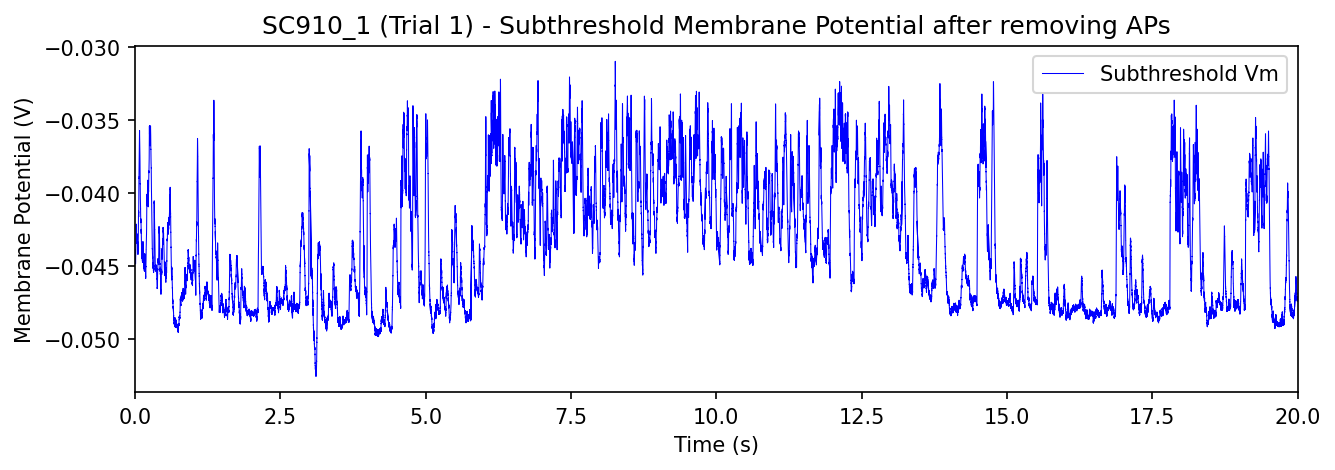

In [26]:
cell_list = sorted(np.unique(df.Cell_ID), reverse=True) #NOTE: DO NOT START WITH AC32 bc. no AP and undefined ap_params content

cell_data = df.iloc[35]
cell_df = df[df.Cell_ID==cell_data['Cell_ID']]
# Get sweeps/trials recorded for that cell, that we are going to iterate over
trial_list = cell_df.Sweep_Counter.values
trial=trial_list[0]


sr_vm = df['Sweep_MembranePotential_SamplingRate'].values[0] #[0] to get the content of the array
membrane_potential = df['Sweep_MembranePotential'].values[0]
ap_vm_deriv_thresh = df['Cell_APThreshold_Slope'].values[0]
        
# Get and update recording duration for that cell by adding trial duration
trial_rec_duration = len(membrane_potential)/sr_vm
#ap_params = None
ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh) 
# Get current trial data
cell_trial_df = cell_df[cell_df.Sweep_Counter==trial]

# Extract action potential parameters
ap_peak_times = ap_params[:, 2]  # Assuming the third column contains AP peak times
ap_thresh_times = ap_params[:, 0]  # Assuming the first column contains AP threshold times

# Process the membrane potential to remove APs
vm_subthreshold = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)

# Time array for plotting
time = np.arange(len(vm_subthreshold)) / sr_vm

# Plotting
fig, ax = plt.subplots(1, 1, figsize=(10, 3), dpi=150)
ax.set_title(f'{cell_data["Cell_ID"]} (Trial {int(trial)}) - Subthreshold Membrane Potential after removing APs')
ax.plot(time, vm_subthreshold, lw=0.5, color='blue', label='Subthreshold Vm')
ax.set_xlabel('Time (s)')
ax.set_ylabel('Membrane Potential (V)')
ax.legend()
plt.xlim([0, len(vm_subthreshold) / sr_vm])  # Adjust this range as needed

# Save the plot if needed
# plt.savefig('path_to_save_figure.png', dpi=150, format='png', bbox_inches='tight')

plt.show()

In [29]:

# Assuming cell_trial_df contains the current trial da
active_touch_times = cell_trial_df['Sweep_ActiveContactTimes'].values[0]
min_iti = 0.2



good_event_times = []

if type(active_touch_times[0]) == np.float64:
        good_event_times.append(active_touch_times)
else:
    for i in np.arange(len(active_touch_times)):
        if i == len(active_touch_times)-1:
            good_event_times.append(active_touch_times[i])
        elif active_touch_times[i+1][0] - active_touch_times[i][1] > min_iti:
            good_event_times.append(active_touch_times[i])

# Process the membrane potential to remove APs
vm_subthreshold = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)

# Time array for indexing
time_array = np.arange(len(vm_subthreshold)) / sr_vm

# Initialize a list to store min and max Vm for each active touch interval
min_max_vm_values = []

# Iterate over each active touch interval
for start, end in active_touch_times:
    # Convert the start and end time of the active touch to indices
    start_index = np.searchsorted(time_array, start)
    end_index = np.searchsorted(time_array, end+0.05)

    # Extract the Vm segment for the current interval
    vm_segment = vm_subthreshold[start_index:end_index]

    # Calculate the minimum and maximum Vm for the segment
    min_vm = np.min(vm_segment)
    max_vm = np.max(vm_segment)

    # Store the results
    min_max_vm_values.append((min_vm, max_vm))

# min_max_vm_values now contains tuples of (min Vm, max Vm) for each active touch interval

In [37]:
good_event_times

[array([ 9.259, 10.055]), array([15.579, 15.589])]

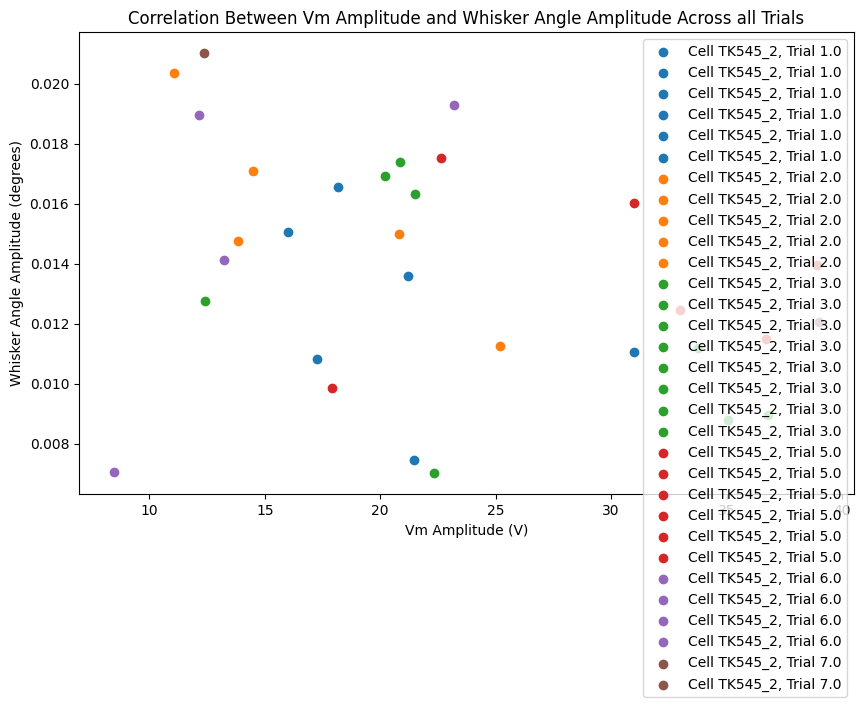

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

cell_list = sorted(np.unique(df.Cell_ID), reverse=True) #NOTE: DO NOT START WITH AC32 bc. no AP and undefined ap_params content

cell_data = df.iloc[35]
cell_df = df[df.Cell_ID==cell_data['Cell_ID']]

# Prepare a colormap
colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinction
color_index = 0

plt.figure(figsize=(10, 6))

trial_list = cell_df.Sweep_Counter.unique()

    # Iterate over each trial
for trial in trial_list:
    trial_data = cell_df[cell_df.Sweep_Counter == trial]

        # Extract necessary data for the trial
    sr_vm = trial_data['Sweep_MembranePotential_SamplingRate'].values[0]
    membrane_potential = trial_data['Sweep_MembranePotential'].values[0]
    ap_vm_deriv_thresh = trial_data['Cell_APThreshold_Slope'].values[0]
    whisker_angle = trial_data['Sweep_WhiskerAngle'].values[0]
    active_touch_times = trial_data['Sweep_ActiveContactTimes'].values[0]

        # Detect action potentials and process membrane potential
    ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh)
    ap_peak_times = ap_params[:, 2]
    ap_thresh_times = ap_params[:, 0]
    vm_subthreshold = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)

        # Time arrays for indexing
    time_vm = np.arange(len(vm_subthreshold)) / sr_vm
    time_whisker = np.arange(len(whisker_angle)) / trial_data['Sweep_WhiskerAngle_SamplingRate'].values[0]

        # Filter active touch times
    good_event_times = []
    if type(active_touch_times[0]) == np.float64:
        good_event_times.append(active_touch_times)
    else:
        for i in np.arange(len(active_touch_times)):
            if i == len(active_touch_times)-1 or active_touch_times[i+1][0] - active_touch_times[i][1] > 0.2:
                good_event_times.append(active_touch_times[i])

        # Calculate min-max for each interval
    for start, end in good_event_times:
            # For membrane potential
        start_index_vm = np.searchsorted(time_vm, start)
        end_index_vm = np.searchsorted(time_vm, end+0.05)
        vm_segment = vm_subthreshold[start_index_vm:end_index_vm]
        vm_amplitude = np.max(vm_segment) - np.min(vm_segment)

            # For whisker angle
        start_index_whisker = np.searchsorted(time_whisker, start-0.05)
        end_index_whisker = np.searchsorted(time_whisker, end)
        whisker_segment = whisker_angle[start_index_whisker:end_index_whisker]
        angle_amplitude = np.max(whisker_segment) - np.min(whisker_segment)

            # Scatter plot for each interval
        plt.scatter(angle_amplitude, vm_amplitude, color=colors[color_index % len(colors)], label=f'Cell {cell_id}, Trial {trial}')

    color_index += 1

# Add labels, title, and legend
plt.xlabel('Vm Amplitude (V)')
plt.ylabel('Whisker Angle Amplitude (degrees)')
plt.title('Correlation Between Vm Amplitude and Whisker Angle Amplitude Across all Trials')
plt.legend()

# Show plot
plt.show()

In [38]:
good_event_times

[array([ 9.259, 10.055]), array([15.579, 15.589])]

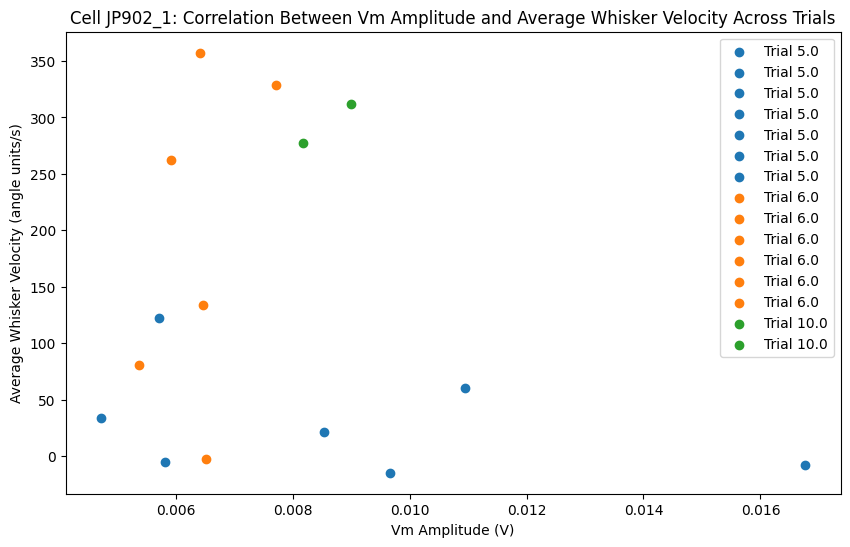

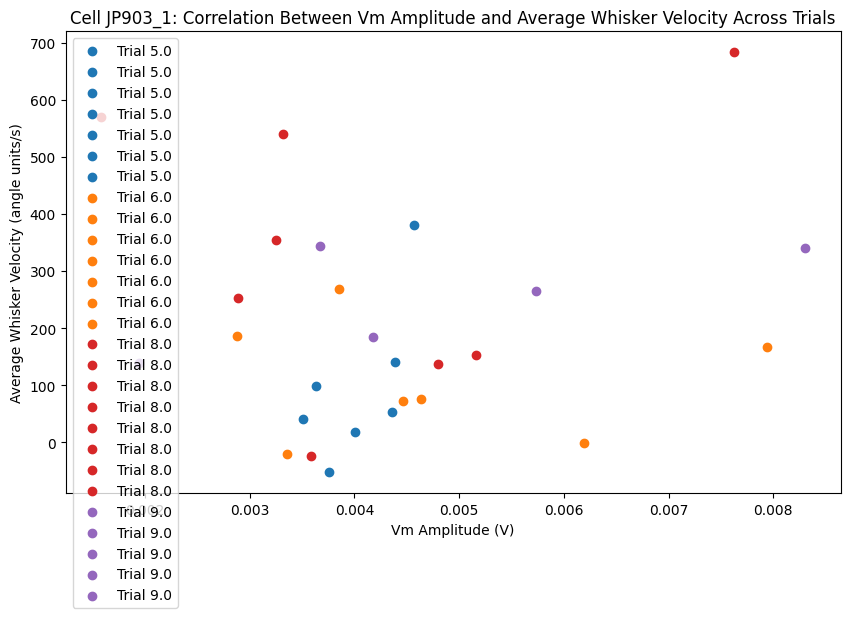

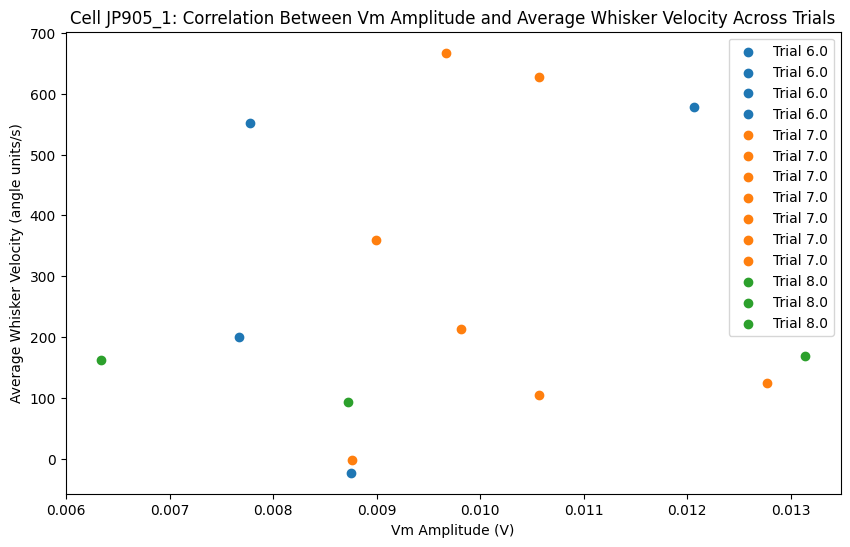

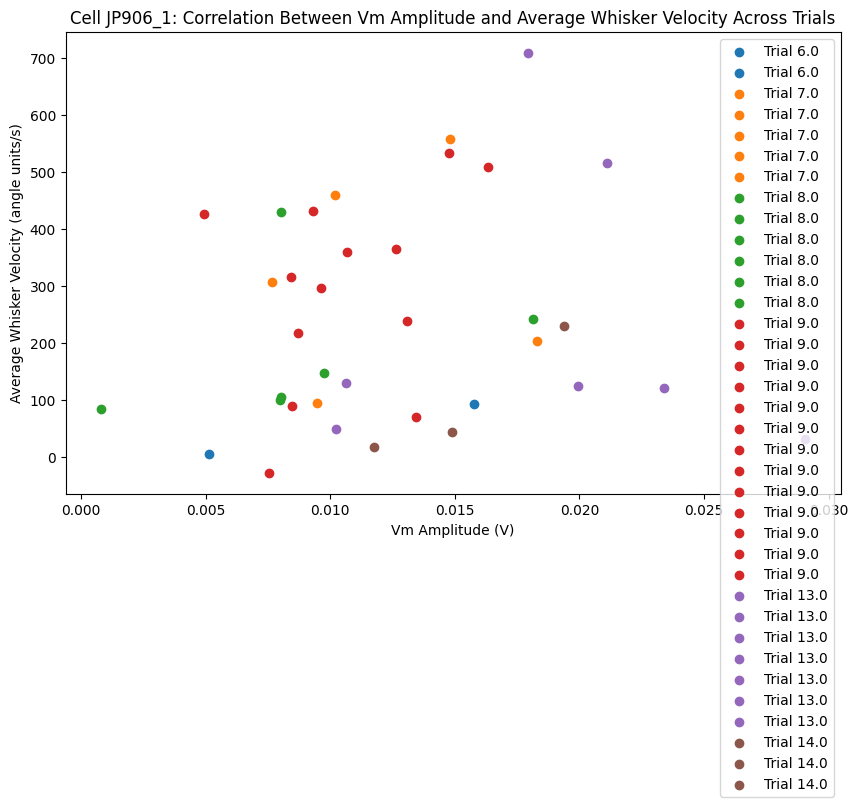

ValueError: zero-size array to reduction operation maximum which has no identity

<Figure size 1000x600 with 0 Axes>

In [45]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Filter out only excitatory cells
exc_cells = df[df['Cell_Type'] == 'EXC']

# Get a list of unique excitatory cell IDs
exc_cell_ids = np.unique(exc_cells['Cell_ID'])

# Prepare a colormap
colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinction

# Iterate over each excitatory cell
for cell_id in exc_cell_ids:
    cell_df = exc_cells[exc_cells['Cell_ID'] == cell_id]
    trial_list = cell_df['Sweep_Counter'].unique()

    plt.figure(figsize=(10, 6))
    color_index = 0

    # Iterate over each trial
    for trial in trial_list:
        trial_data = cell_df[cell_df['Sweep_Counter'] == trial]

        # Extract necessary data for the trial
        sr_vm = trial_data['Sweep_MembranePotential_SamplingRate'].values[0]
        membrane_potential = trial_data['Sweep_MembranePotential'].values[0]
        ap_vm_deriv_thresh = trial_data['Cell_APThreshold_Slope'].values[0]
        whisker_angle = trial_data['Sweep_WhiskerAngle'].values[0]
        active_touch_times = trial_data['Sweep_ActiveContactTimes'].values[0]

        # Detect action potentials and process membrane potential
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh)
        ap_peak_times = ap_params[:, 2]
        ap_thresh_times = ap_params[:, 0]
        vm_subthreshold = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)

        # Time arrays for indexing
        time_vm = np.arange(len(vm_subthreshold)) / sr_vm
        time_whisker = np.arange(len(whisker_angle)) / trial_data['Sweep_WhiskerAngle_SamplingRate'].values[0]

        # Filter active touch times
        good_event_times = []
        if isinstance(active_touch_times, np.ndarray) and active_touch_times.ndim == 2:
            for i in np.arange(len(active_touch_times)):
                if i == len(active_touch_times) - 1 or active_touch_times[i+1][0] - active_touch_times[i][1] > 0.2:
                    good_event_times.append(active_touch_times[i])
        elif isinstance(active_touch_times, np.ndarray) and active_touch_times.ndim == 1:
            good_event_times.append(active_touch_times)



        for start, end in good_event_times:
            # For membrane potential
            start_index_vm = np.searchsorted(time_vm, start)
            end_index_vm = np.searchsorted(time_vm, end + 0.05)
            vm_segment = vm_subthreshold[start_index_vm:end_index_vm]
            vm_amplitude = np.max(vm_segment) - np.min(vm_segment)


            # For whisker angle velocity
            start_index_whisker = np.searchsorted(time_whisker, start - 0.05)
            end_index_whisker = np.searchsorted(time_whisker, end)
            whisker_segment = whisker_angle[start_index_whisker:end_index_whisker]
            time_segment = time_whisker[start_index_whisker:end_index_whisker]

            # Calculate the velocity (first derivative) of whisker angle
            if len(whisker_segment) > 1:
                whisker_velocity = np.diff(whisker_segment) / np.diff(time_segment)
                avg_whisker_velocity = np.mean(whisker_velocity)  # Average velocity over the interval
            else:
                avg_whisker_velocity = np.nan

            # Scatter plot for each interval
            if not np.isnan(vm_amplitude) and not np.isnan(avg_whisker_velocity):
                plt.scatter(vm_amplitude, avg_whisker_velocity, color=colors[color_index % len(colors)], label=f'Trial {trial}')

        color_index += 1

    # Add labels, title, and legend
    plt.xlabel('Vm Amplitude (V)')
    plt.ylabel('Average Whisker Velocity (angle units/s)')
    plt.title(f'Cell {cell_id}: Correlation Between Vm Amplitude and Average Whisker Velocity Across Trials')
    plt.legend()

    # Show plot
    plt.show()

In [47]:
sweep_type = 'active touch'

pre_window = 0.05 # time before whisking onset (s)
post_window = 0.05 # time after whisking onset (s)
min_event_dur = 0 # minimal duration of whisking episode to be considered
min_iti = 0.2 # minimal intertrial interval (ITI) between 2 consecutive whisking episode (s)
min_number_trials = 2 # minimal number of trial
bin_size = 0.05 # bin size for psth (s)
epoch_bounds = {'pre':[-0.5, -0.3], 'post':[0,0.2]}  # time boundaries to compute changes in whisker protraction (WP)

## Excitatory cells

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors

# Filter out only excitatory cells
exc_cells = df[df['Cell_Type'] == 'EXC']

# Get a list of unique excitatory cell IDs
exc_cell_ids = np.unique(exc_cells['Cell_ID'])

# Prepare a colormap
colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinction

# Iterate over each excitatory cell
for cell_id in exc_cell_ids:
    cell_df = exc_cells[exc_cells['Cell_ID'] == cell_id]
    trial_list = cell_df['Sweep_Counter'].unique()

    plt.figure(figsize=(10, 6))
    color_index = 0

    # Iterate over each trial
    for trial in trial_list:
        trial_data = cell_df[cell_df['Sweep_Counter'] == trial]

        # Extract necessary data for the trial
        sr_vm = trial_data['Sweep_MembranePotential_SamplingRate'].values[0]
        membrane_potential = trial_data['Sweep_MembranePotential'].values[0]
        ap_vm_deriv_thresh = trial_data['Cell_APThreshold_Slope'].values[0]
        whisker_angle = trial_data['Sweep_WhiskerAngle'].values[0]
        active_touch_times = trial_data['Sweep_ActiveContactTimes'].values[0]

        # Detect action potentials and process membrane potential
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh)
        ap_peak_times = ap_params[:, 2]
        ap_thresh_times = ap_params[:, 0]
        vm_subthreshold = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)

        # Time arrays for indexing
        time_vm = np.arange(len(vm_subthreshold)) / sr_vm
        time_whisker = np.arange(len(whisker_angle)) / trial_data['Sweep_WhiskerAngle_SamplingRate'].values[0]

        # Filter active touch times
        good_event_times = []
        if isinstance(active_touch_times, np.ndarray) and active_touch_times.ndim == 2:
            for i in np.arange(len(active_touch_times)):
                if i == len(active_touch_times) - 1 or active_touch_times[i+1][0] - active_touch_times[i][1] > 0.2:
                    good_event_times.append(active_touch_times[i])
        elif isinstance(active_touch_times, np.ndarray) and active_touch_times.ndim == 1:
            good_event_times.append(active_touch_times)



        for start, end in good_event_times:
            # For membrane potential
            start_index_vm = np.searchsorted(time_vm, start)
            end_index_vm = np.searchsorted(time_vm, end + 0.05)
            vm_segment = vm_subthreshold[start_index_vm:end_index_vm]
            vm_amplitude = np.max(vm_segment) - np.min(vm_segment)


            # For whisker angle velocity
            start_index_whisker = np.searchsorted(time_whisker, start - 0.05)
            end_index_whisker = np.searchsorted(time_whisker, end)
            whisker_segment = whisker_angle[start_index_whisker:end_index_whisker]
            time_segment = time_whisker[start_index_whisker:end_index_whisker]

            # Calculate the velocity (first derivative) of whisker angle
            if len(whisker_segment) > 1:
                whisker_velocity = np.diff(whisker_segment) / np.diff(time_segment)
                avg_whisker_velocity = np.mean(whisker_velocity)  # Average velocity over the interval
            else:
                avg_whisker_velocity = np.nan

            # Scatter plot for each interval
            if not np.isnan(vm_amplitude) and not np.isnan(avg_whisker_velocity):
                plt.scatter(vm_amplitude, avg_whisker_velocity, color=colors[color_index % len(colors)], label=f'Trial {trial}')

        color_index += 1

    # Add labels, title, and legend
    plt.xlabel('Vm Amplitude (V)')
    plt.ylabel('Average Whisker Velocity (Degree/s)')
    plt.title(f'Cell {cell_id}: Correlation Between Vm Amplitude and Average Whisker Velocity Across Trials')
    plt.legend()

    # Show plot
    plt.show()

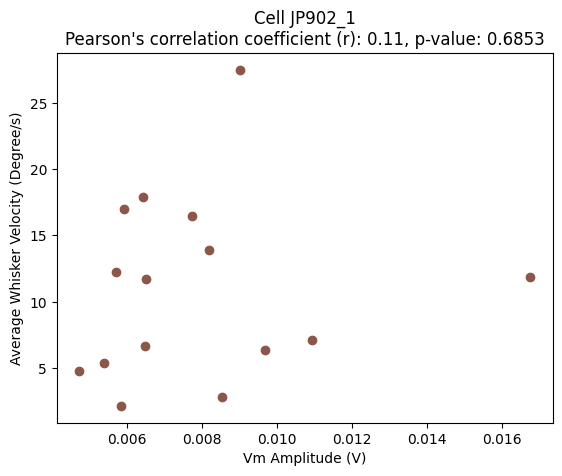

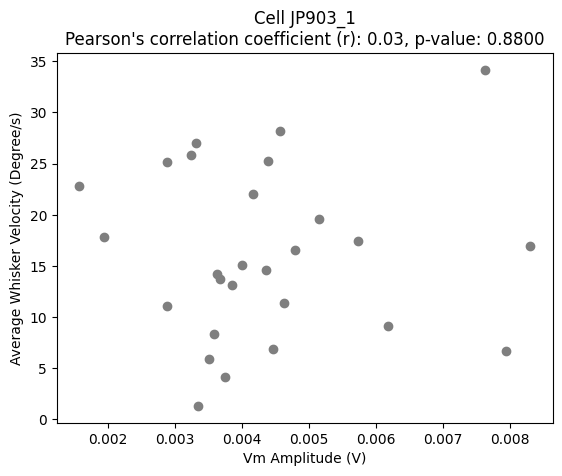

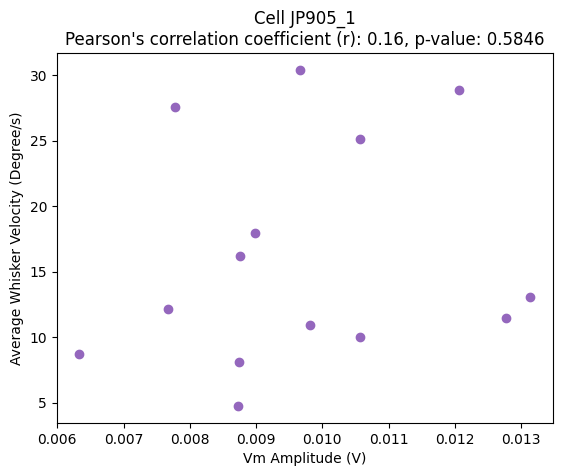

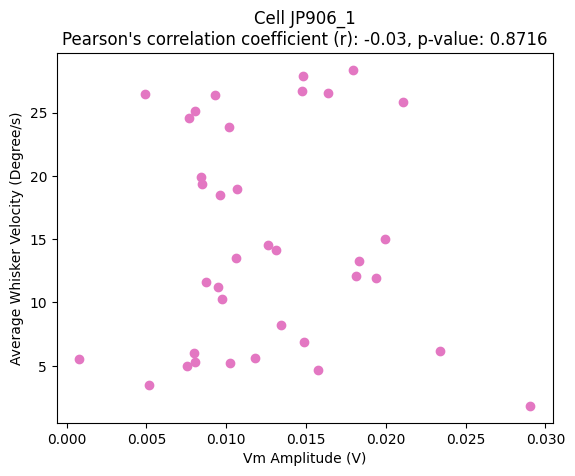

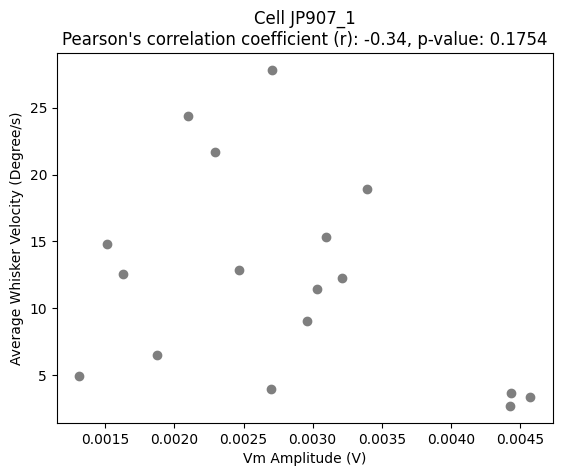

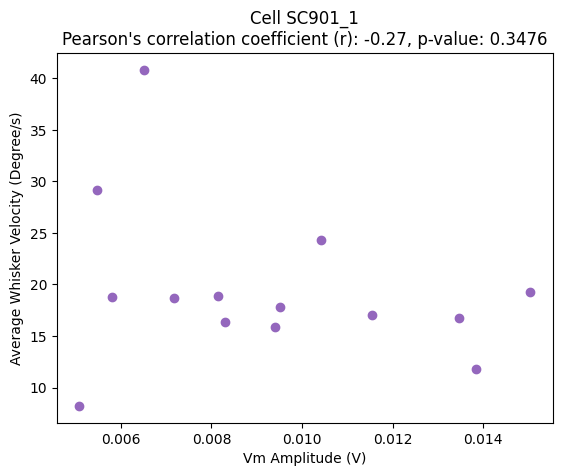

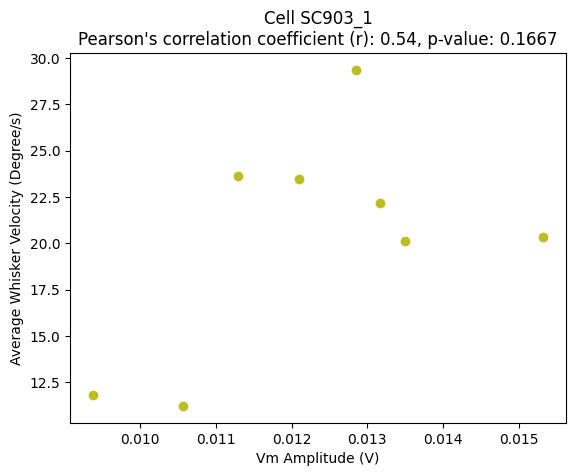

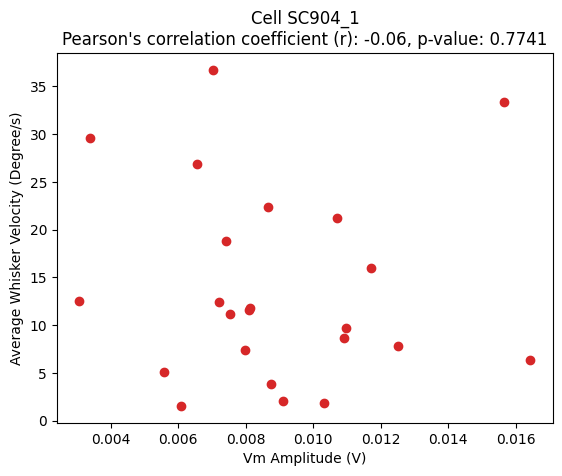

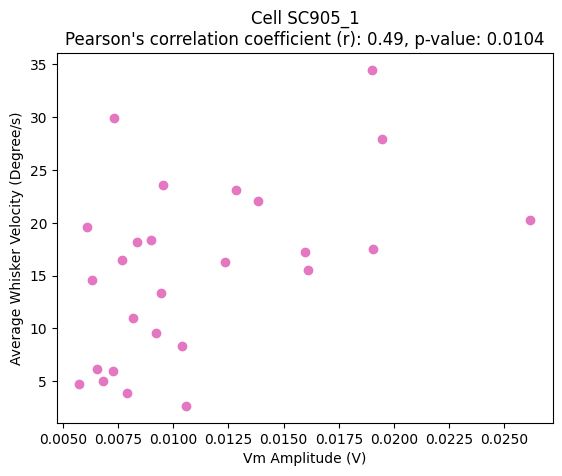

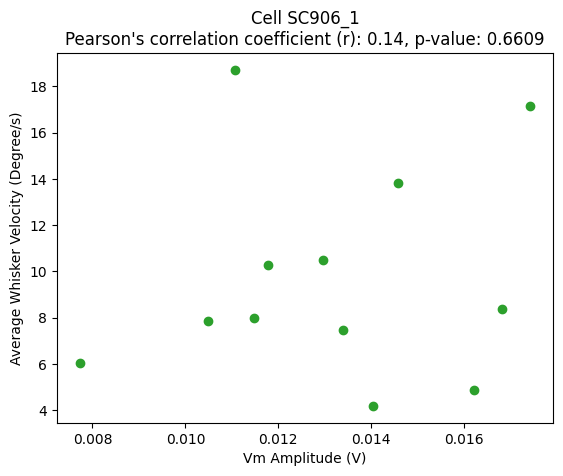

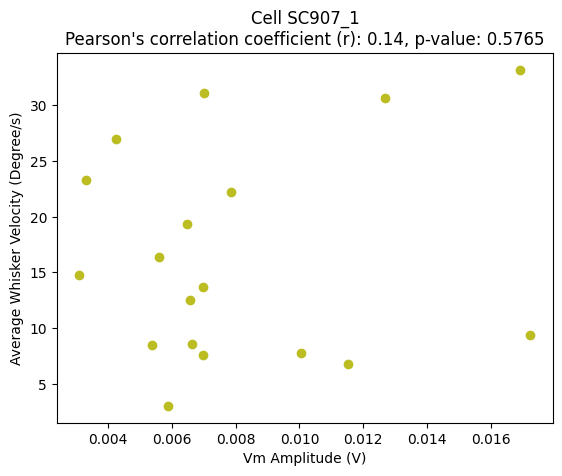

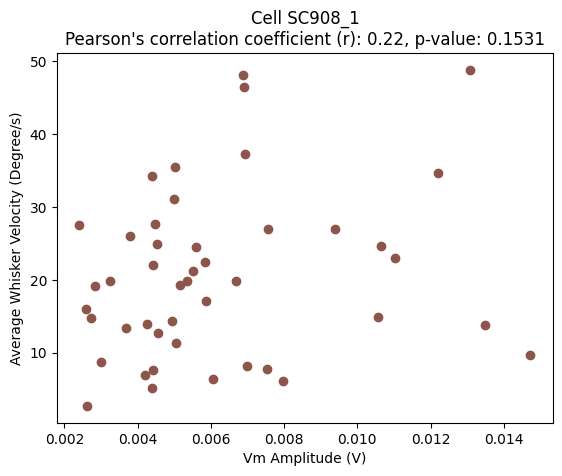

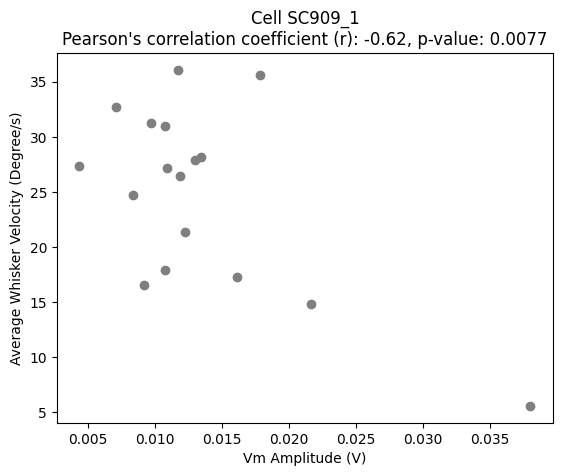

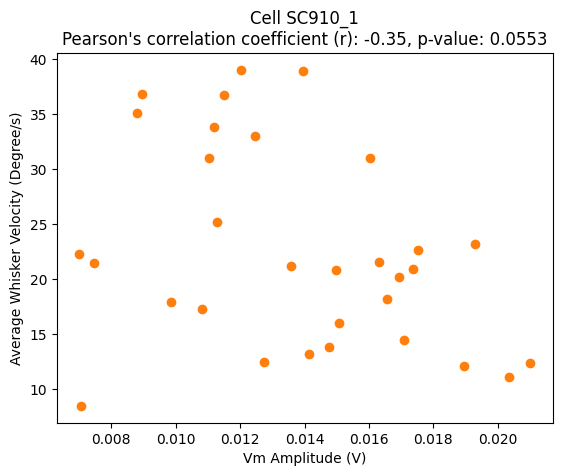

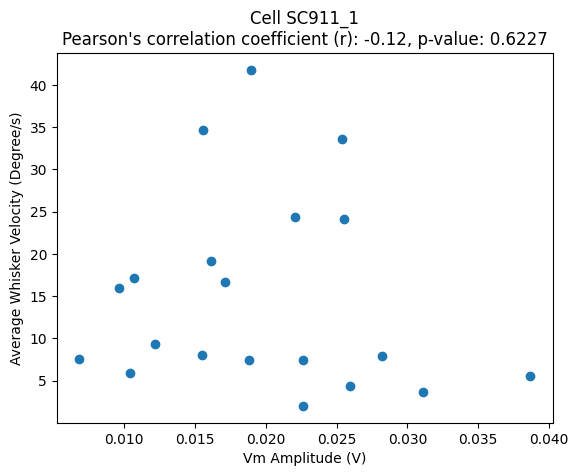

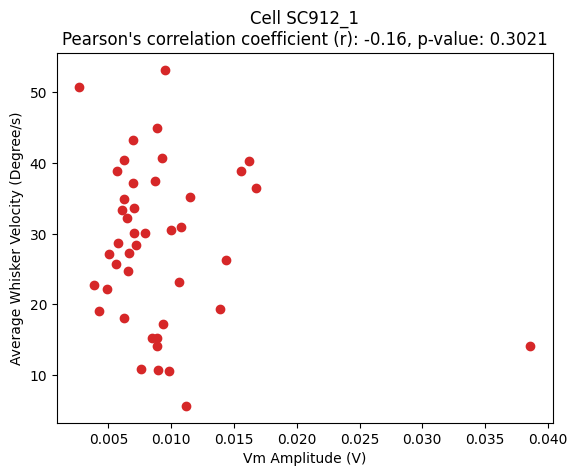

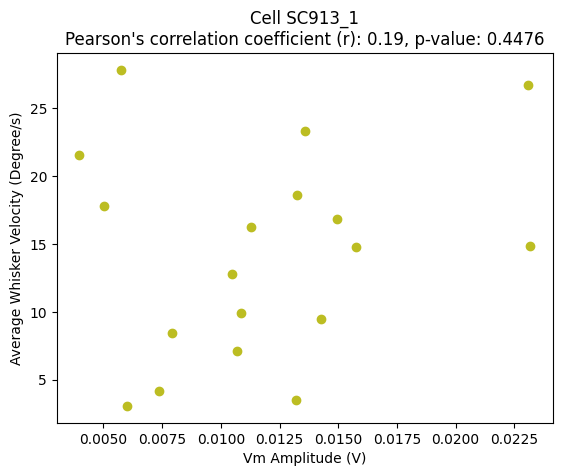

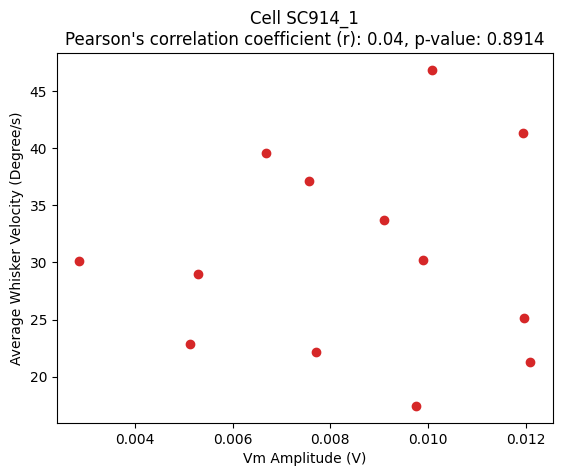

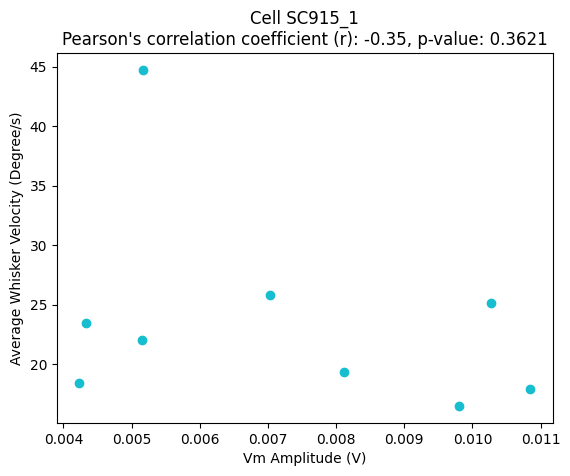

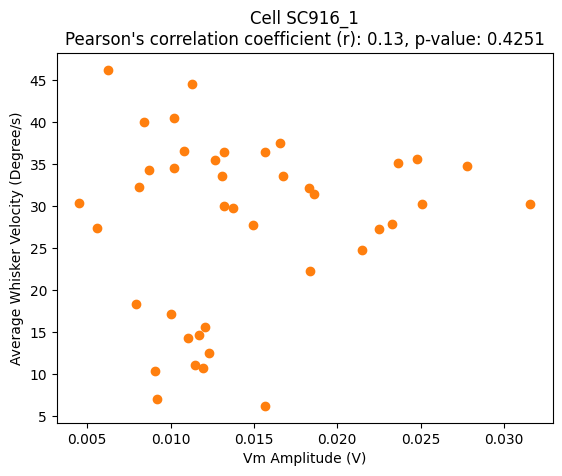

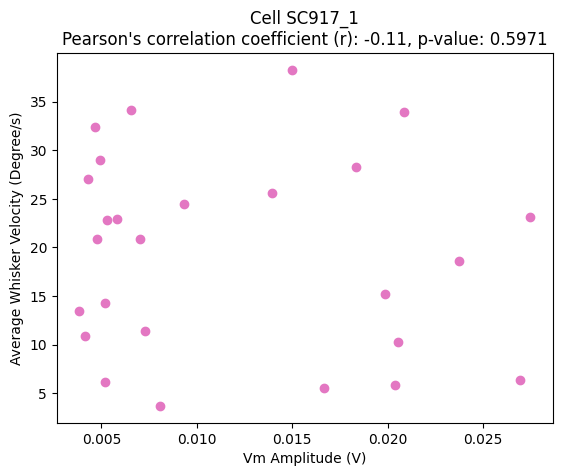

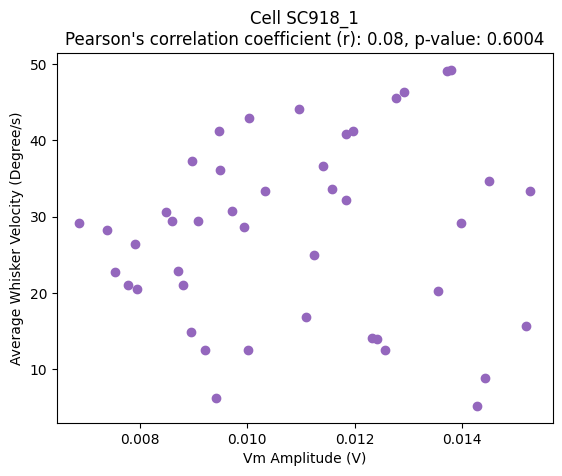

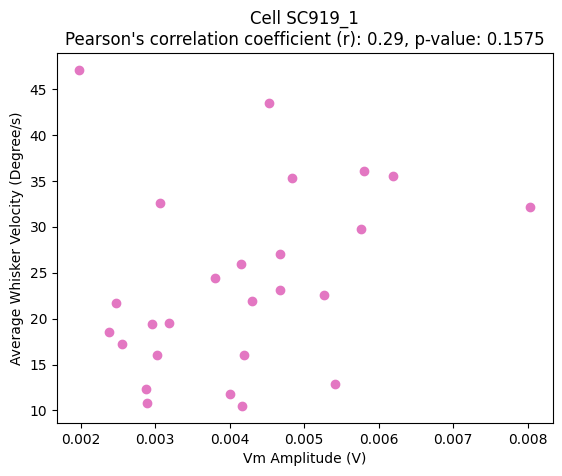

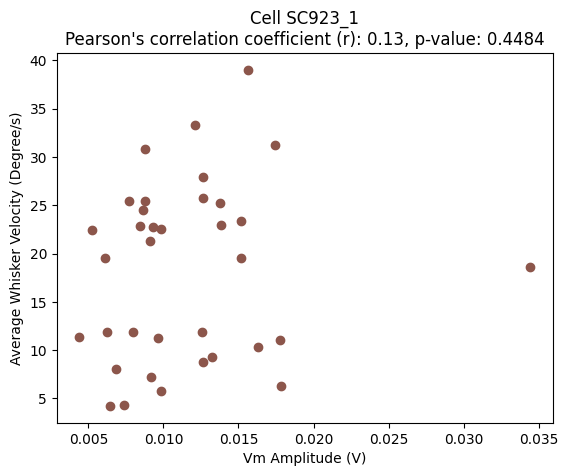

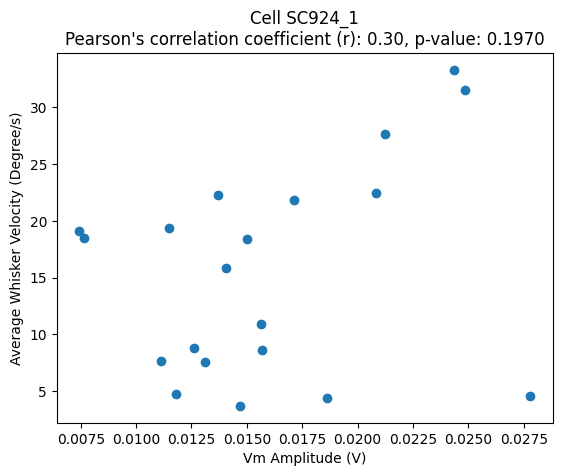

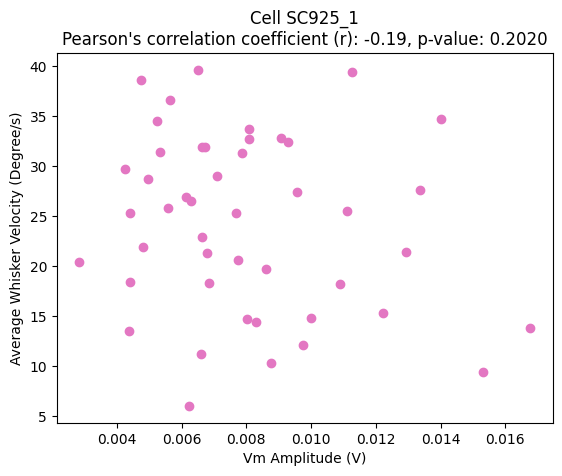

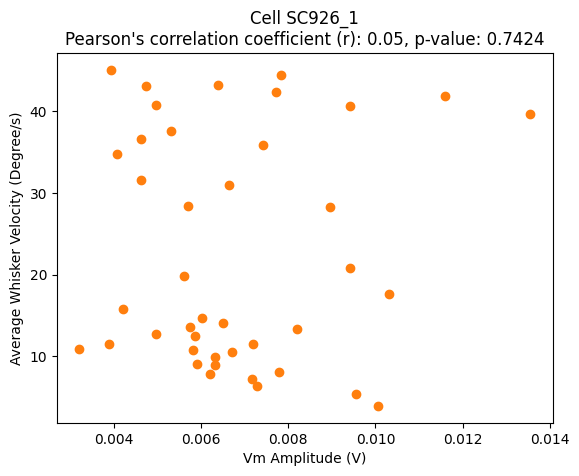

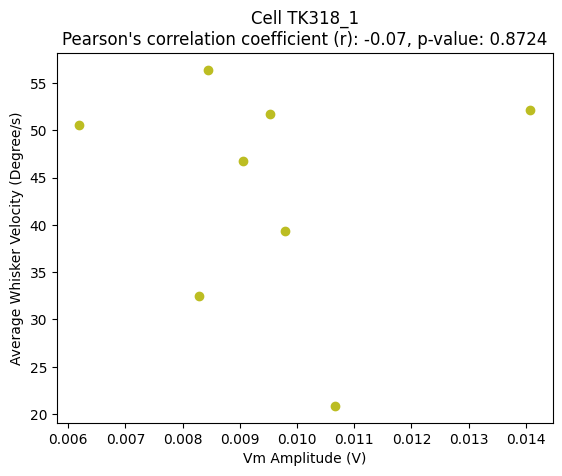

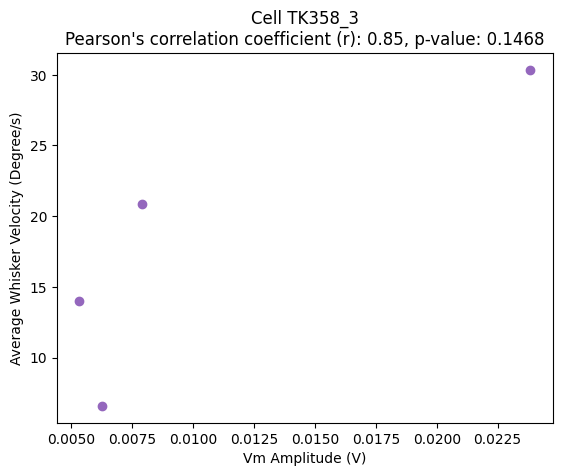

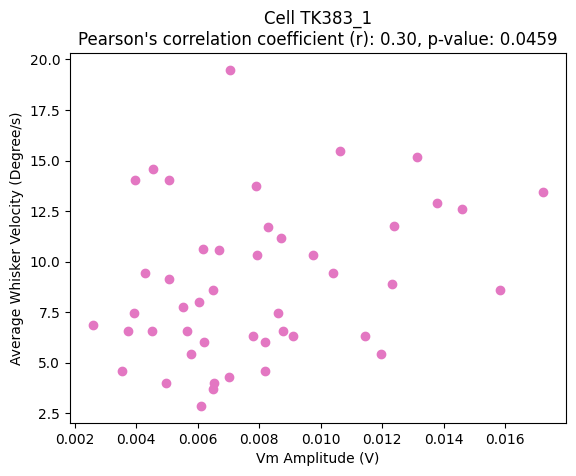

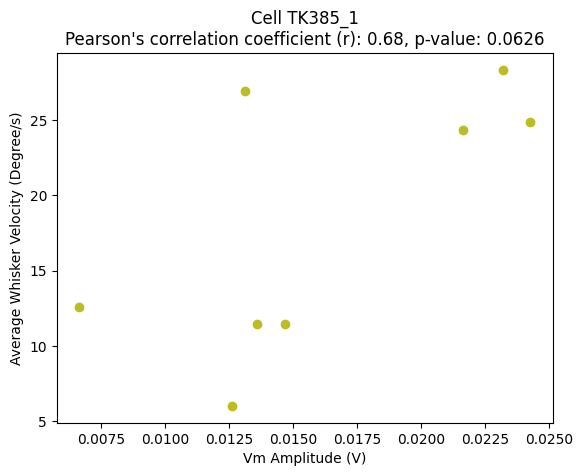

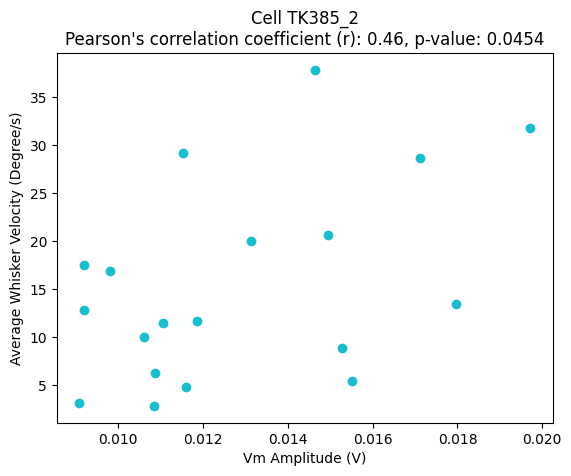

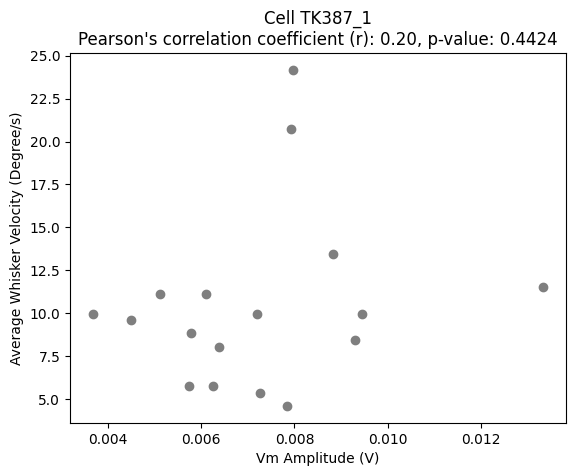

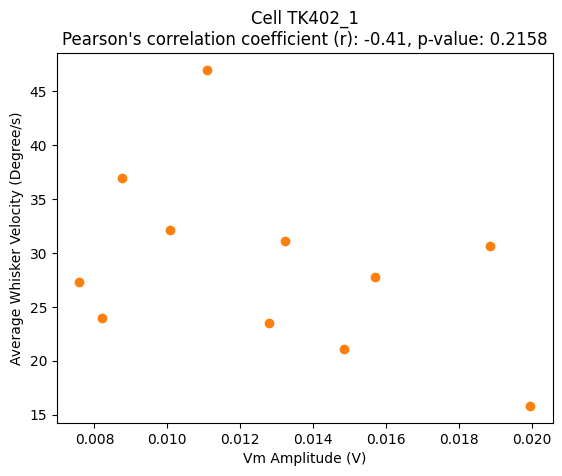

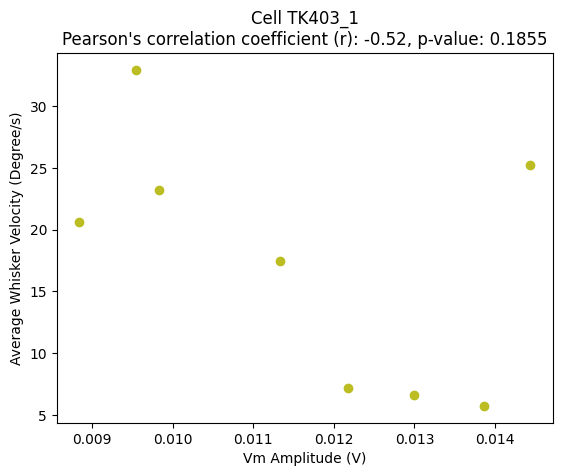

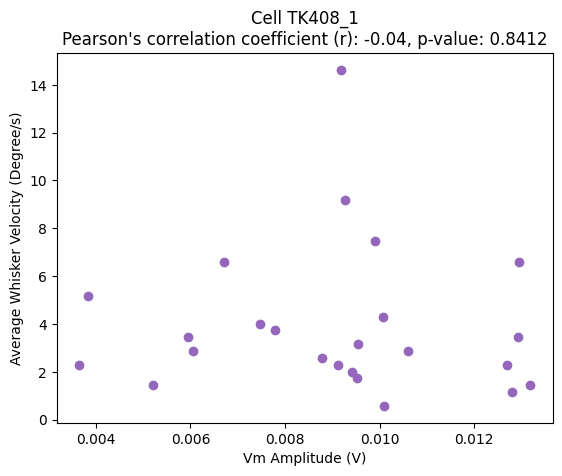

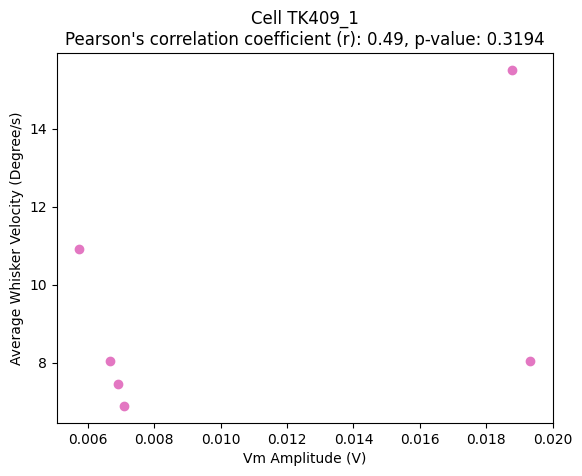

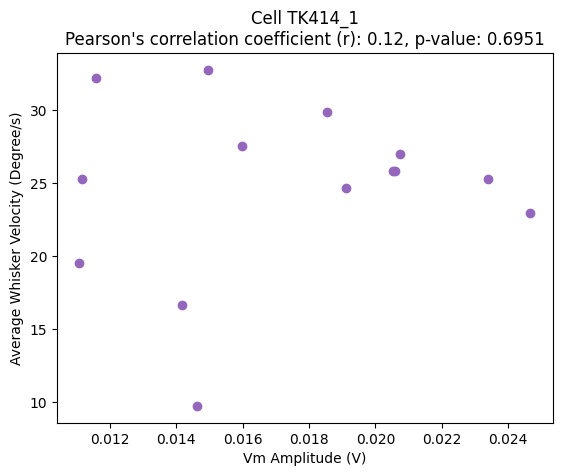

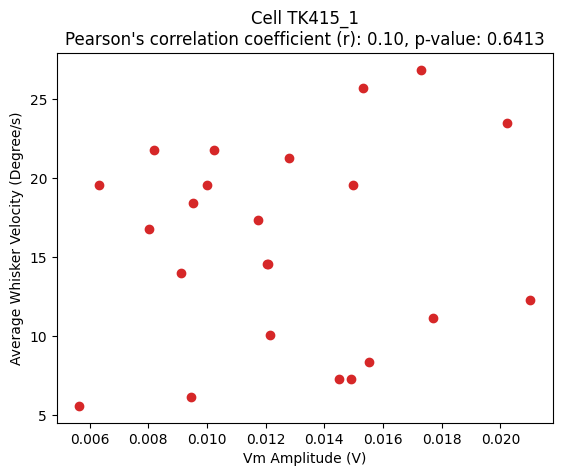

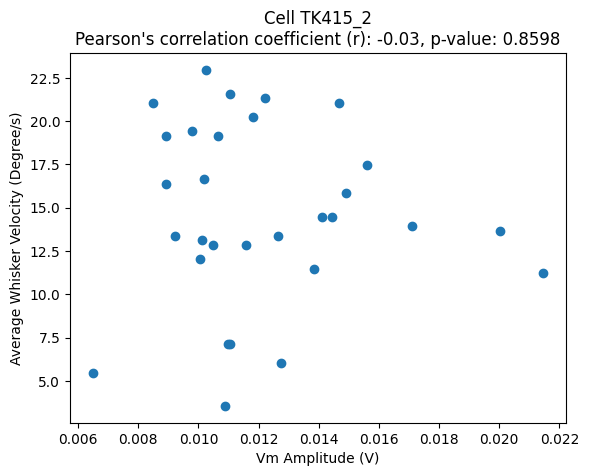

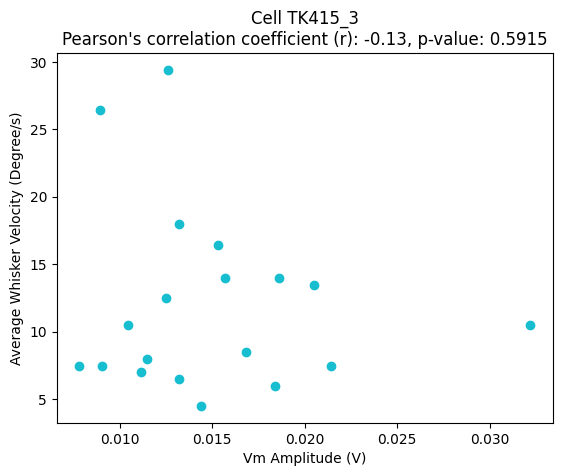

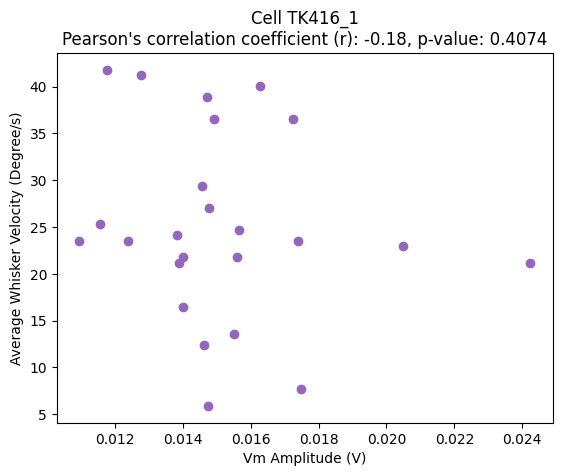

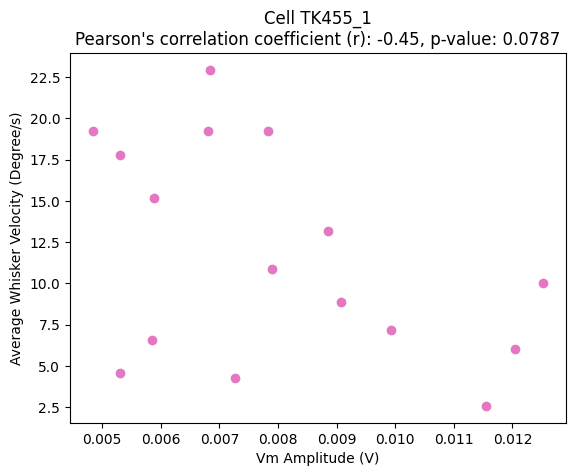

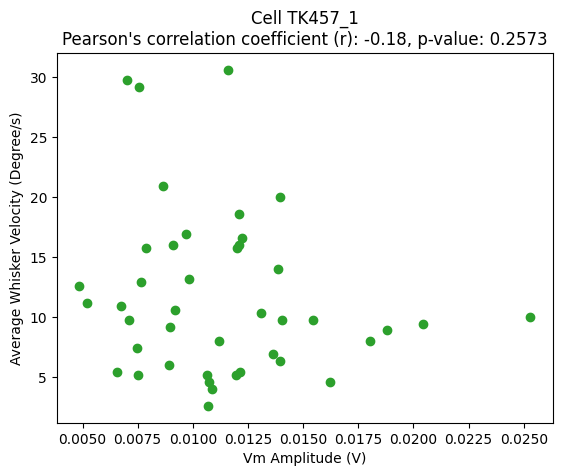

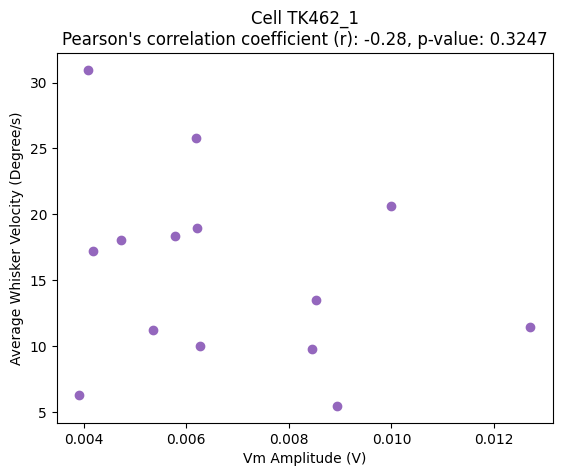

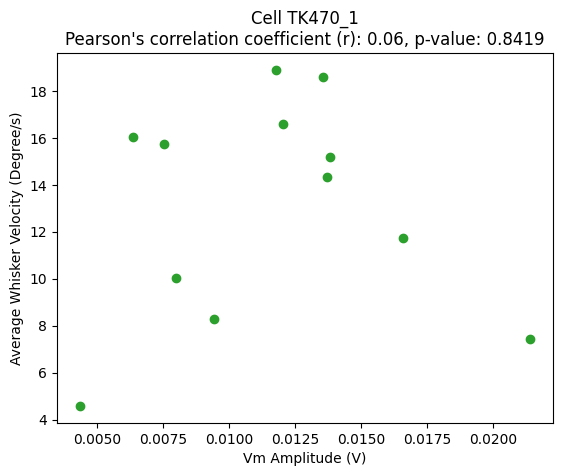

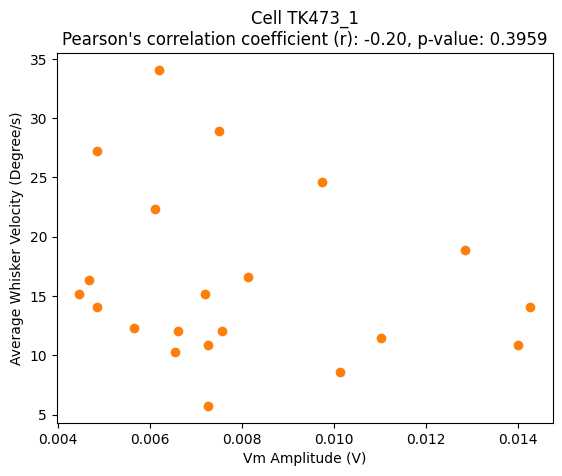

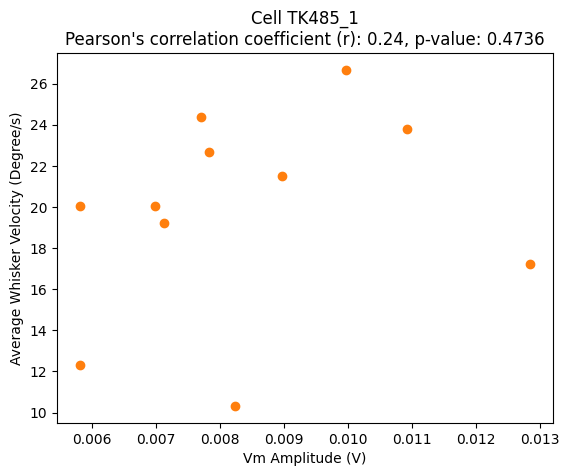

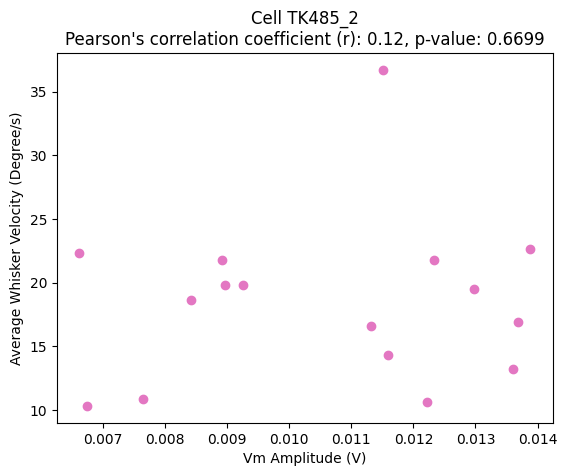

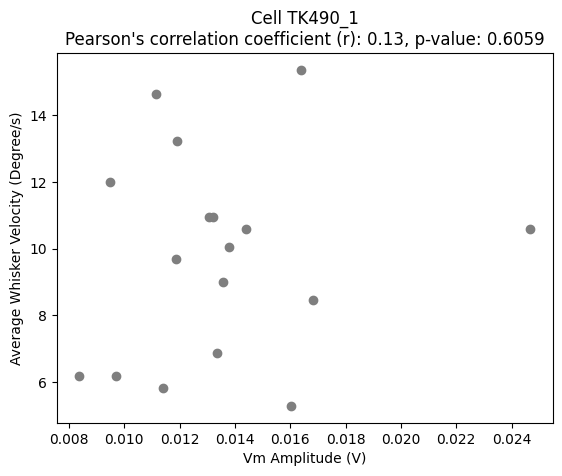

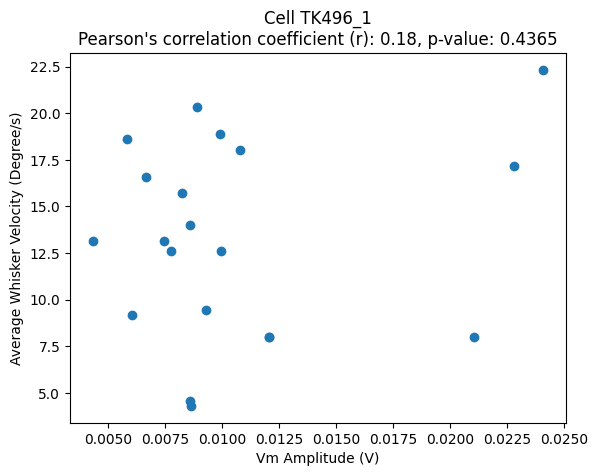

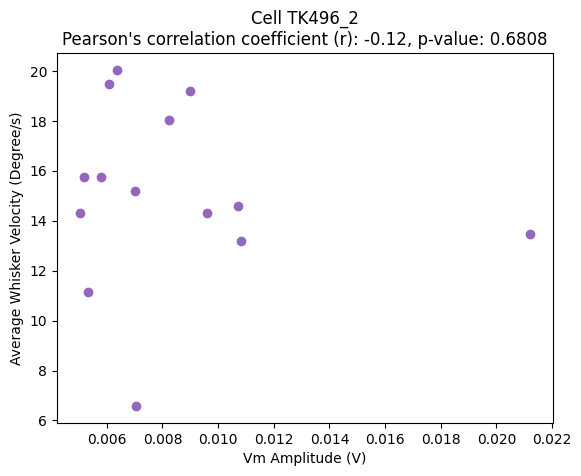

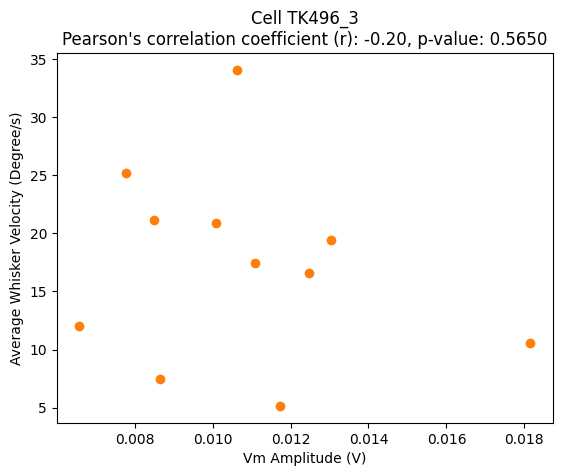

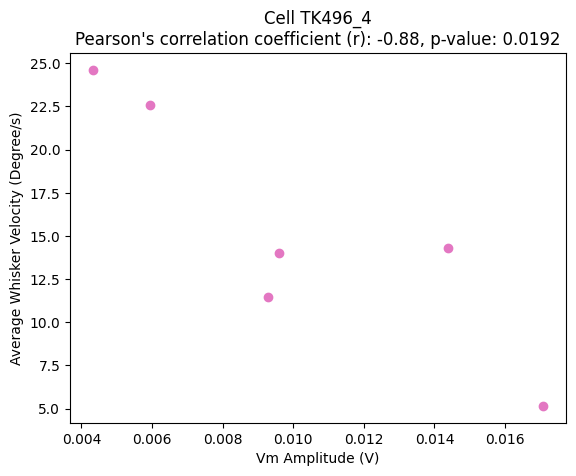

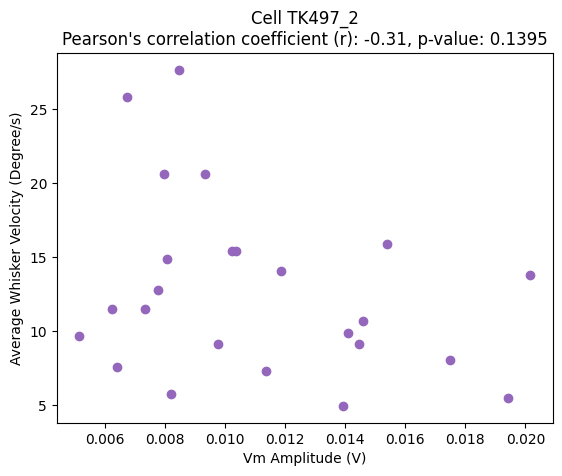

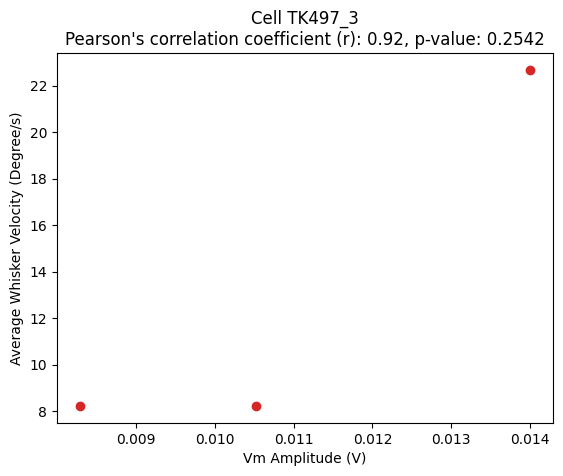

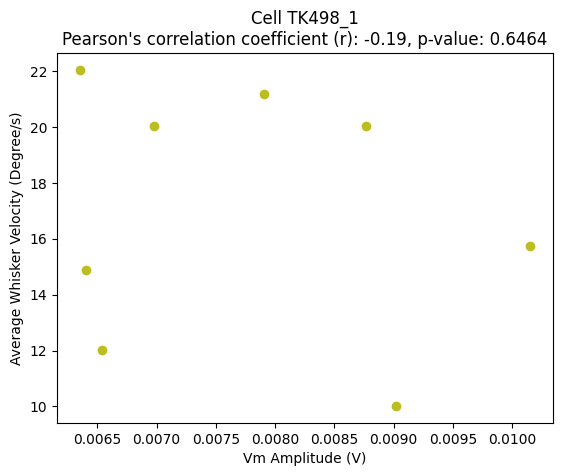

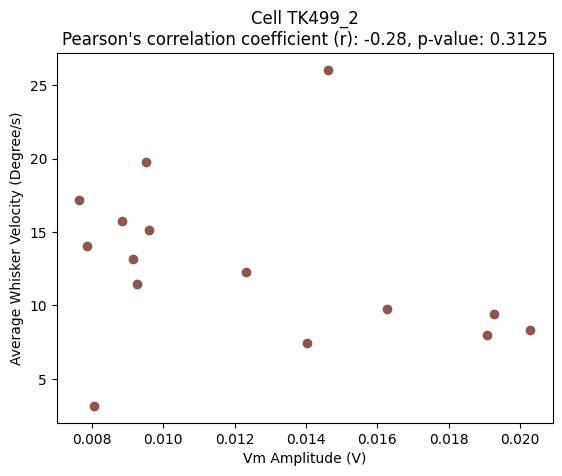

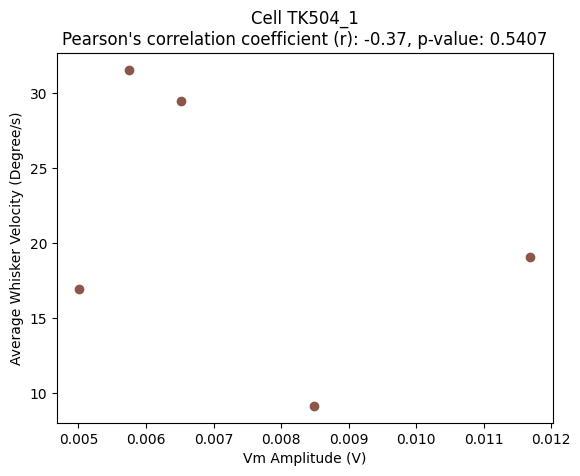

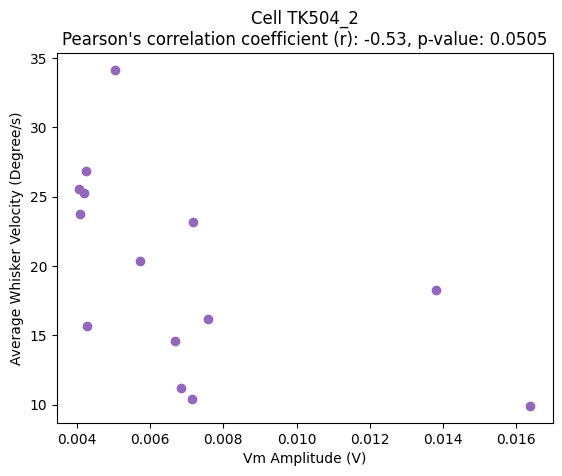

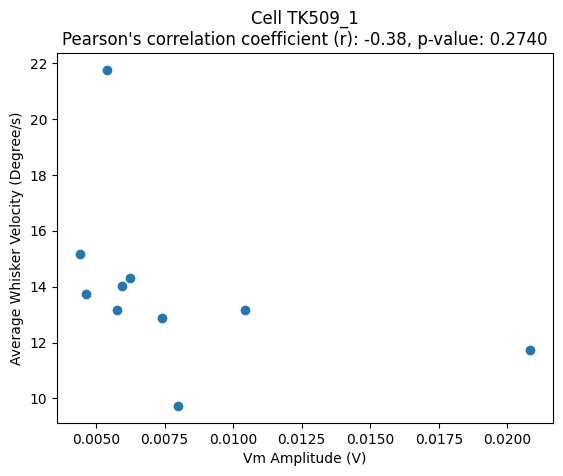

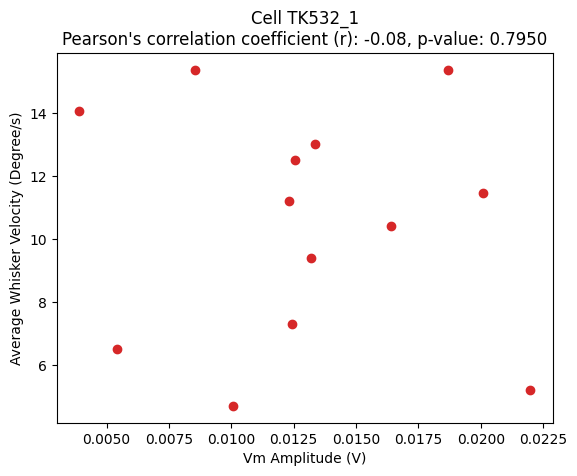

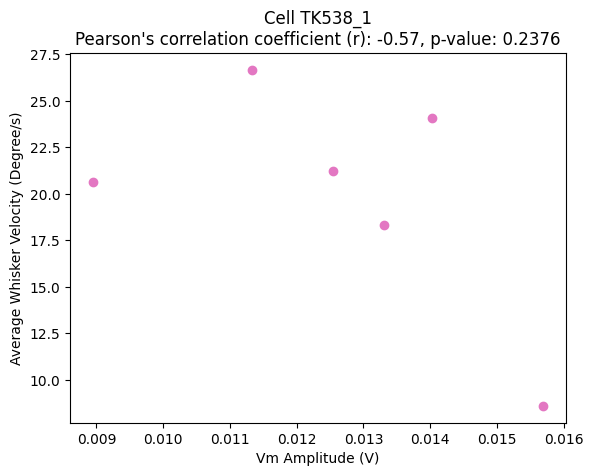

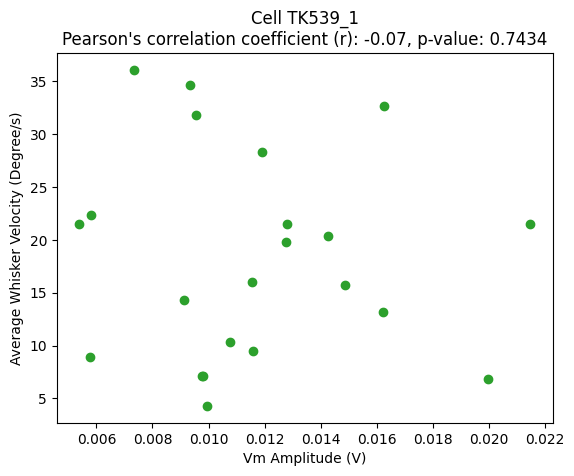

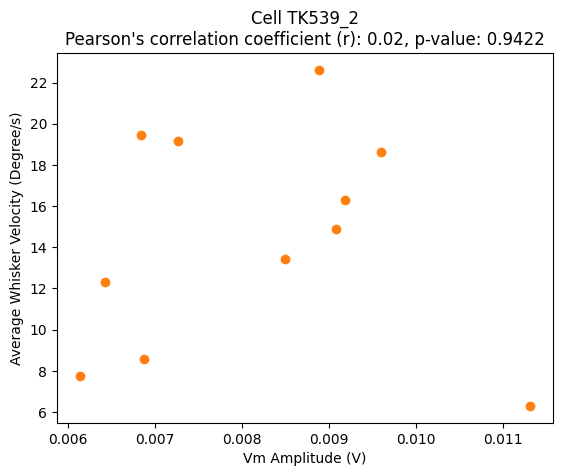

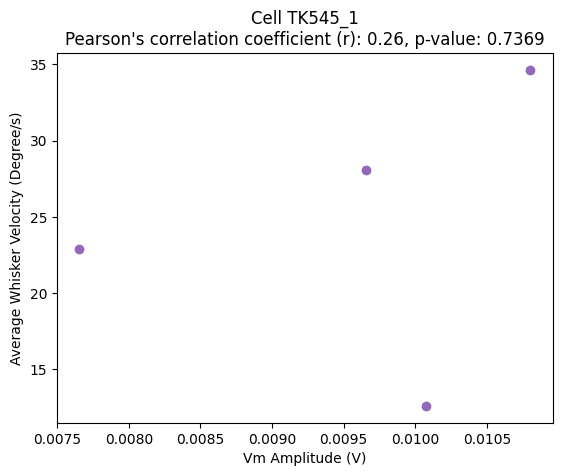

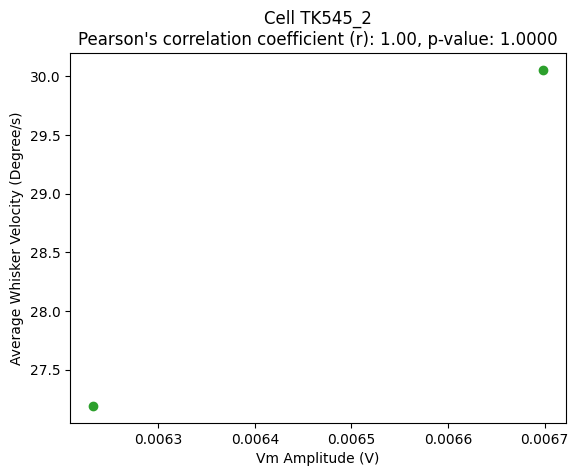

In [53]:
colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinction

for idx, cell_id in enumerate(np.unique(df.Cell_ID)):
    cell_df = df[df.Cell_ID==cell_id]
    cell_df = cell_df[cell_df.Cell_Type=='EXC']
    color_index = 0
    #print(cell_df.head(5))
    wp_amp_tot = []
    vm_amp_tot = []
    for cell in range(len(cell_df)):
        #print(cell)
        event_times = cell_df['Sweep_ActiveContactTimes'].values[cell]
        if np.isnan(event_times).any():
            continue
        sr_vm = cell_df['Sweep_MembranePotential_SamplingRate'].values[cell] #[0] to get the content of the array
        membrane_potential = cell_df['Sweep_MembranePotential'].values[cell]
        ap_vm_deriv_thresh = cell_df['Cell_APThreshold_Slope'].values[cell]
            
        # Template: extract whisker angle and sampling rate of whisker video data
        wp = cell_df['Sweep_WhiskerAngle'].values[cell]
        sr_wp = cell_df['Sweep_WhiskerAngle_SamplingRate'].values[cell]
        wp_time = np.arange(len(wp))/sr_wp
        vm_time = np.arange(len(membrane_potential))/sr_vm

        #now detect and cut out APs.
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh)         
                    
        ap_duration = []
        if (ap_params.any()):
            ap_thresh_times = ap_params[:,0]
            ap_thresh_vm = ap_params[:,1]
            ap_peak_times = ap_params[:,2]
            ap_peak_vm = ap_params[:,3]
            ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)
                #... if so, cut-out individual APs to keep subthreshold Vm only
            vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
        else:
            vm_sub = membrane_potential.copy()

        #we keep only the events that are far away from each other (more than min-iti)
        good_event_times = []
        #print(len(event_times))
        #print(event_times)

        if type(event_times[0]) == np.float64:
            good_event_times.append(event_times)
        else: 
            for i in range(len(event_times)):
                if i == len(event_times)-1:
                    good_event_times.append(event_times[i])
                elif event_times[i+1][0] - event_times[i][1] > min_iti:
                    good_event_times.append(event_times[i])

        for start, end in good_event_times:
            if start > end:
                continue
            # Convert the start and end time of the active touch to indices
            start_index_vm = np.searchsorted(vm_time, start)
            end_index_vm = np.searchsorted(vm_time, end+post_window)
            start_index_wp = np.searchsorted(wp_time, max(start-pre_window,0))
            end_index_wp = np.searchsorted(wp_time, end)

            amp_wp = max(wp[start_index_wp:end_index_wp])- min(wp[start_index_wp:end_index_wp])
            wp_amp_tot.append(amp_wp)

            amp_vm = max(vm_sub[start_index_vm:end_index_vm])- min(vm_sub[start_index_vm:end_index_vm])
            vm_amp_tot.append(amp_vm)
            color_index += 1
    correlation_coefficient, p_value = pearsonr(vm_amp_tot, wp_amp_tot)

    plt.scatter(vm_amp_tot, wp_amp_tot, color=colors[color_index % len(colors)], label=f'Trial {trial}')
    #plt.scatter(vm_amp_tot,wp_amp_tot)
    plt.xlabel('Vm Amplitude (V)')
    plt.ylabel('Average Whisker Velocity (Degree/s)')
    plt.title(f'Cell {cell_id}\nPearson\'s correlation coefficient (r): {correlation_coefficient:.2f}, p-value: {p_value:.4f}')
    plt.show()
            


In [143]:
df_exc = active_touch_df[active_touch_df['Cell_Type'] == 'EXC']
df_exc 

Cell_APThreshold_Slope Cell_Anatomy  Cell_Counter  Cell_Depth  Cell_ID   
0                      10.0         L2/3           1.0       229.0  SC901_1  \
1                      10.0         L2/3           1.0       229.0  SC901_1   
3                      10.0         L2/3           1.0       229.0  SC901_1   
4                      10.0         L2/3           1.0       229.0  SC901_1   
5                      10.0         L2/3           1.0       229.0  SC901_1   
..                      ...          ...           ...         ...      ...   
620                    15.0           L4           2.0       460.0  TK539_2   
621                    15.0           L4           2.0       460.0  TK539_2   
623                    10.0           L4           1.0       432.0  TK545_1   
625                    25.0           L4           2.0       390.0  TK545_2   
626                    25.0           L4           2.0       390.0  TK545_2   

    Cell_Layer Cell_TargetedBrainArea Cell_Type Cell_tdTomatoExpressing   
0         L2/3                     C2       EXC                   False  \
1         L2/3                     C2       EXC                   False   
3         L2/3                     C2       EXC                   False   
4         L2/3                     C2       EXC                   False   
5         L2/3                     C2       EXC                   False   
..         ...                    ...       ...                     ...   
620         L4                     C2       EXC                    True   
621         L4                     C2       EXC                    True   
623         L4                     C2       EXC                    True   
625         L4                     C2       EXC                    True   
626         L4                     C2       EXC                    True   

     Mouse_DateOfBirth  ... Sweep_Counter   
0                  NaN  ...           1.0  \
1                  NaN  ...           2.0   
3                  NaN  ...           4.0   
4                  NaN  ...           5.0   
5                  NaN  ...           6.0   
..                 ...  ...           ...   
620             2017.0  ...           1.0   
621             2017.0  ...           2.0   
623             2016.0  ...           1.0   
625             2016.0  ...           1.0   
626             2016.0  ...           2.0   

                               Sweep_MembranePotential   
0    [-0.044009375, -0.044028125, -0.0439875, -0.04...  \
1    [-0.046275, -0.04629375, -0.046259375, -0.0462...   
3    [-0.04655625, -0.0465875, -0.046575, -0.046596...   
4    [-0.047296875, -0.047284375, -0.047265625, -0....   
5    [-0.040259375, -0.040284375, -0.040284375, -0....   
..                                                 ...   
620  [-0.06493165939018428, -0.06495139106057463, -...   
621  [-0.059617267734583854, -0.05954162980331142, ...   
623  [-0.05053415164553155, -0.05047824550450753, -...   
625  [-0.07429106450681139, -0.07431737349338013, -...   
626  [-0.053960870970394315, -0.05396744817014917, ...   

    Sweep_MembranePotential_SamplingRate   
0                                20000.0  \
1                                20000.0   
3                                20000.0   
4                                20000.0   
5                                20000.0   
..                                   ...   
620                              20000.0   
621                              20000.0   
623                              20000.0   
625                              20000.0   
626                              20000.0   

                             Sweep_PassiveContactTimes   
0    [[4.567, 4.713], [7.327, 7.519], [14.481, 14.6...  \
1    [[15.274999999999999, 15.375], [16.247, 16.643...   
3                                                  nan   
4    [[4.411000000000001, 4.4809999999999945], [5.2...   
5    [[1.992999999999995, 2.272999999999996], [9.82...   
..                                      

## Now for the PV cells

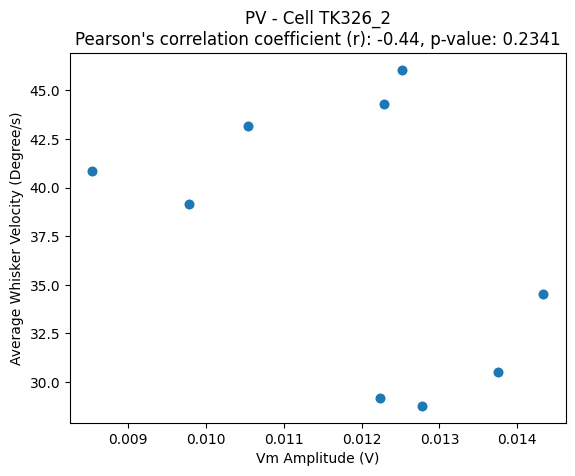

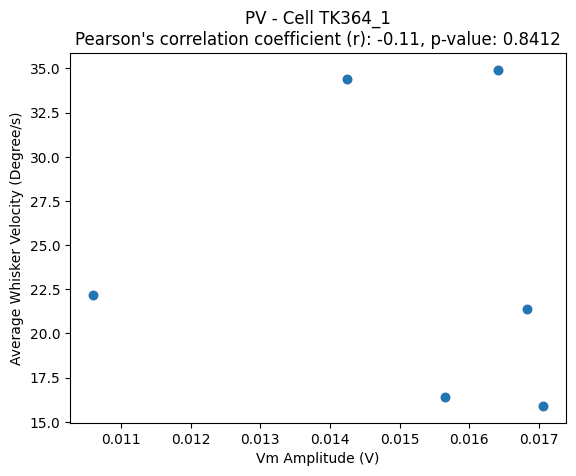

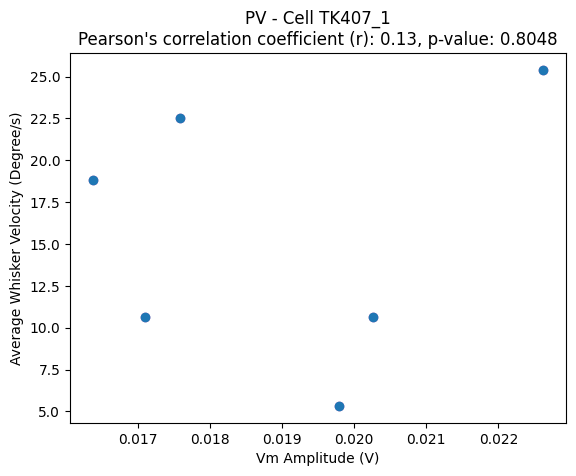

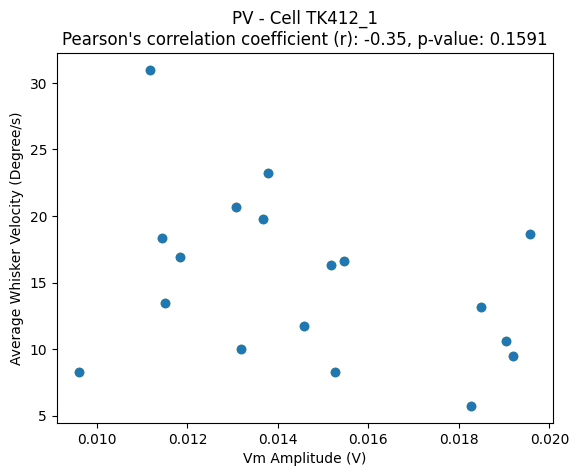

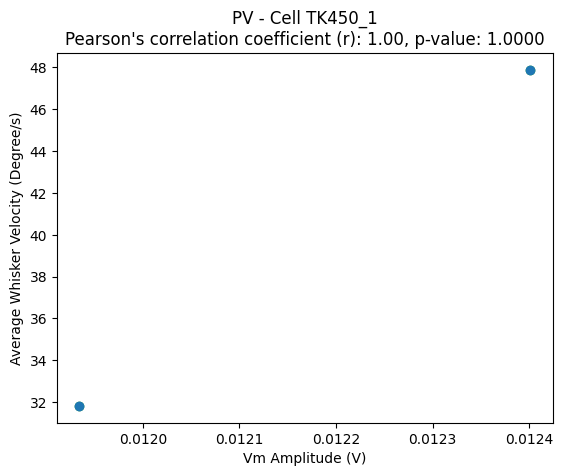

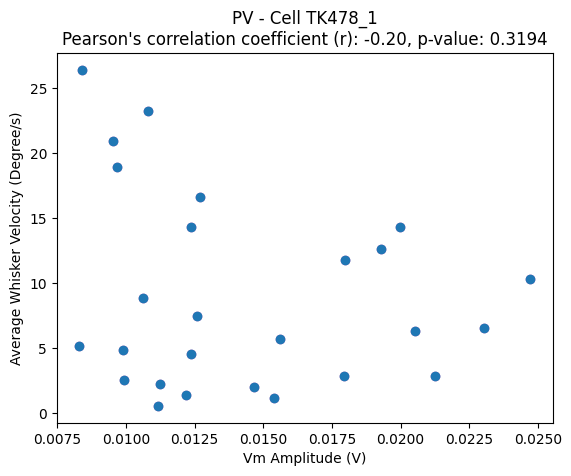

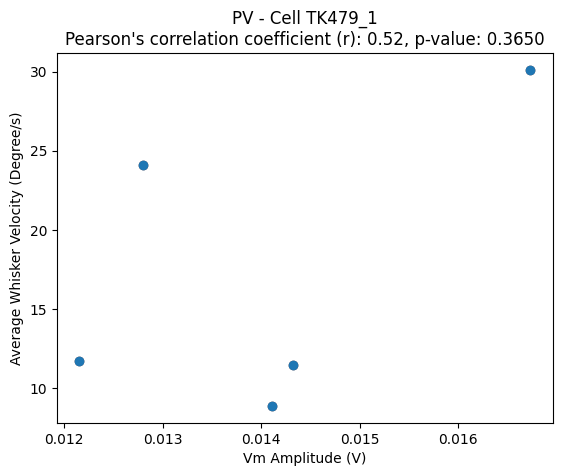

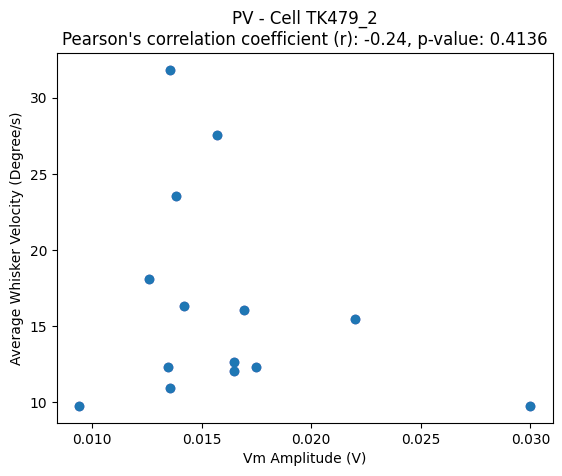

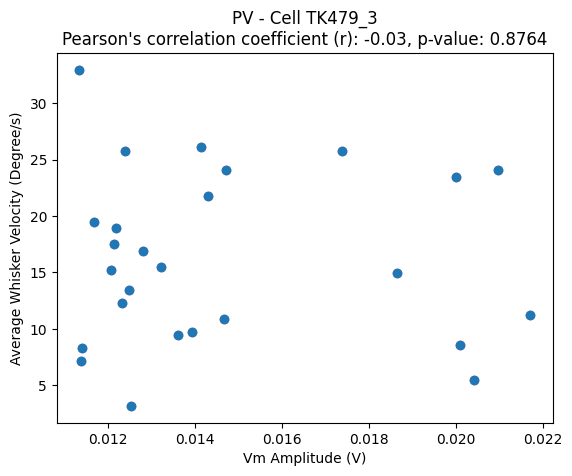

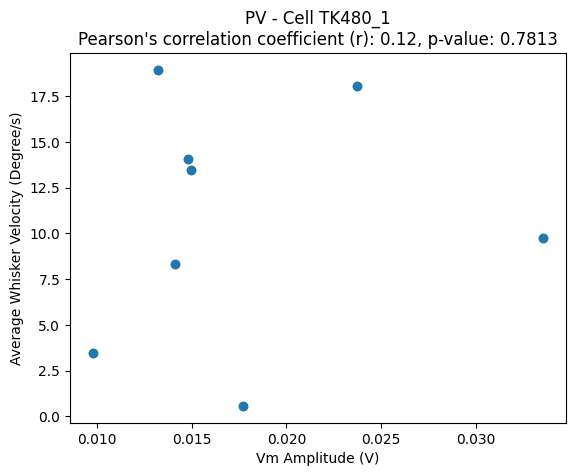

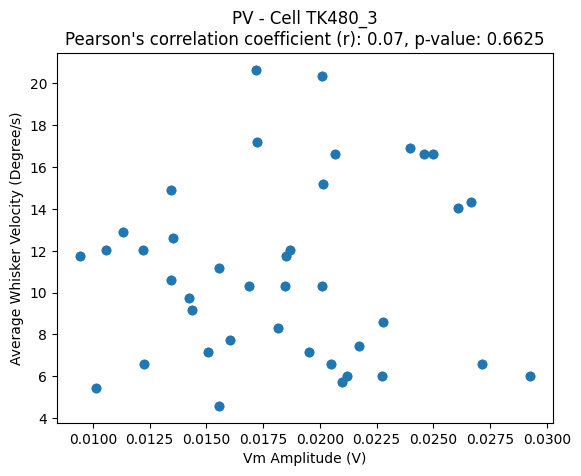

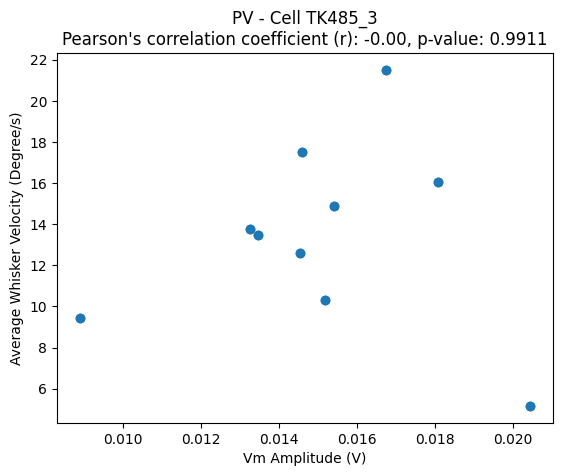

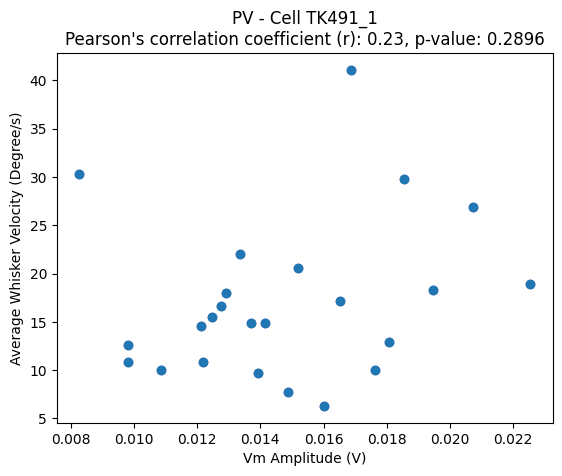

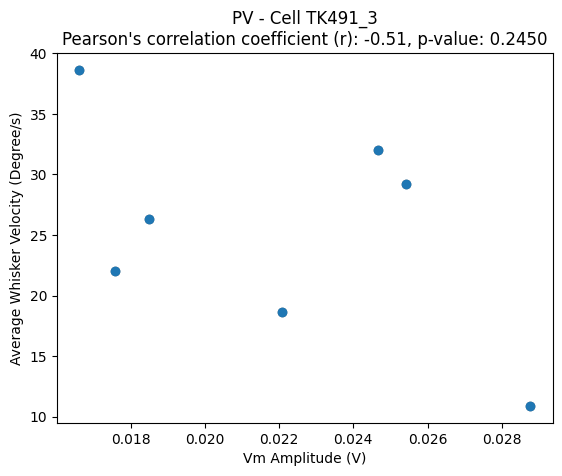

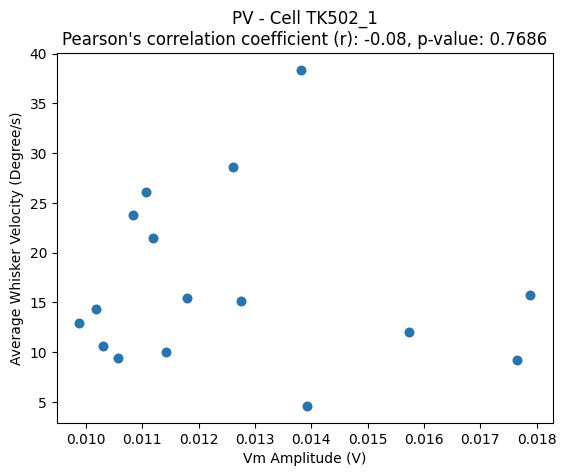

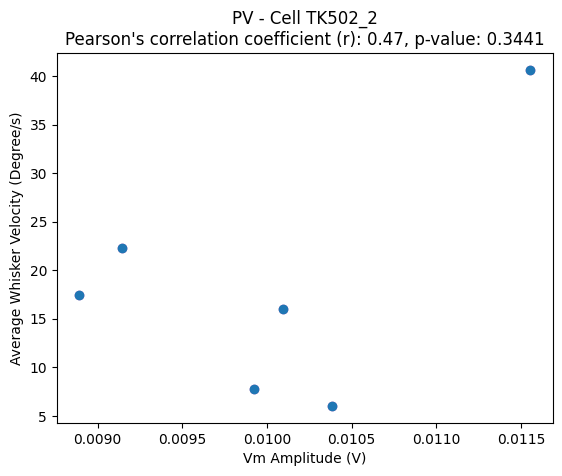

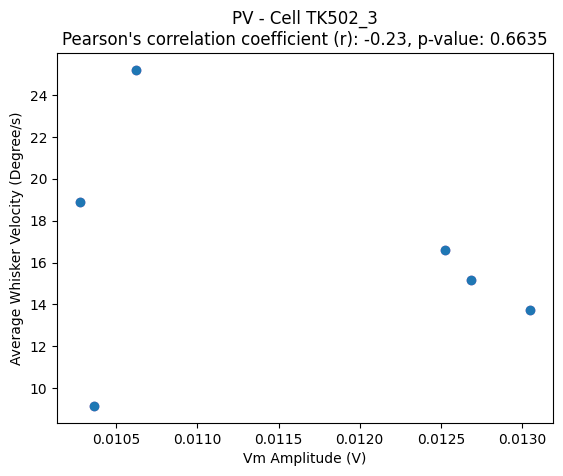

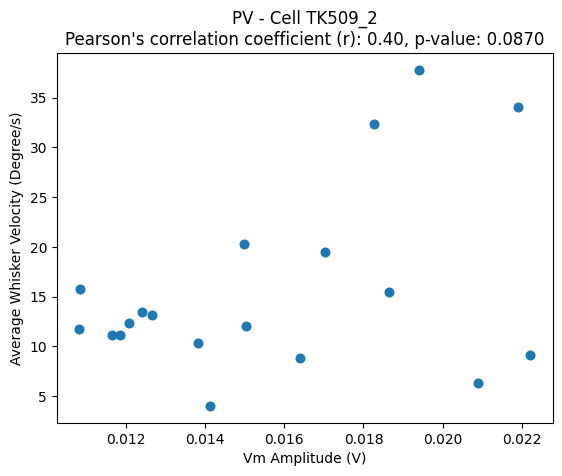

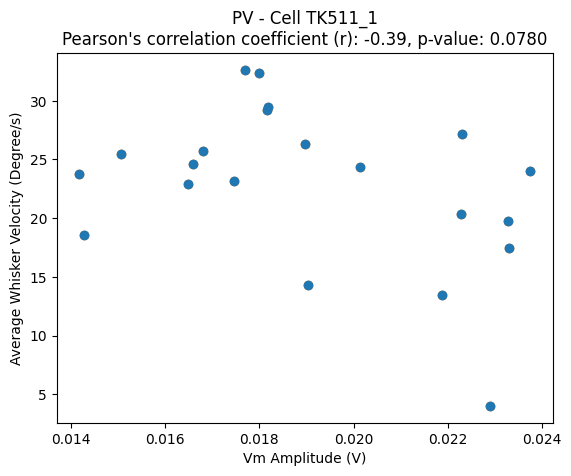

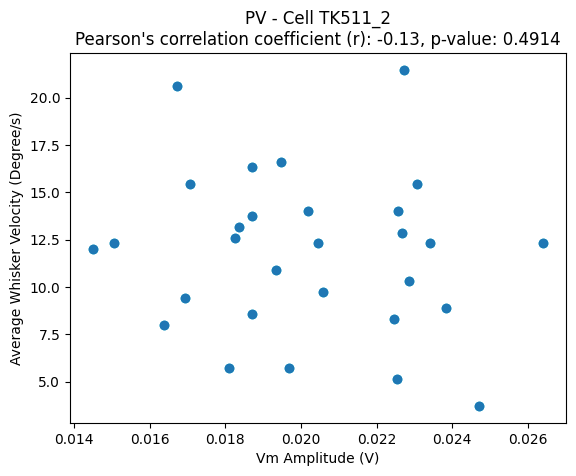

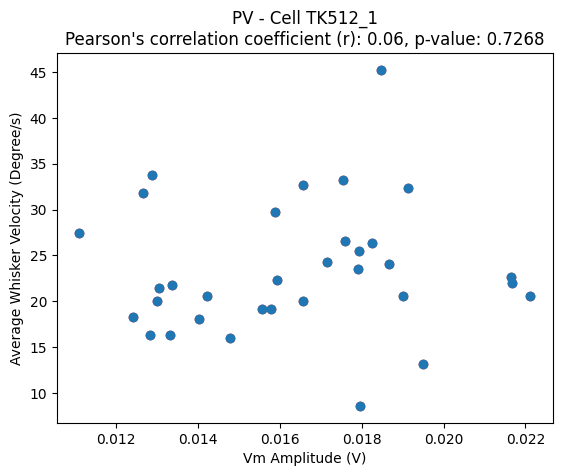

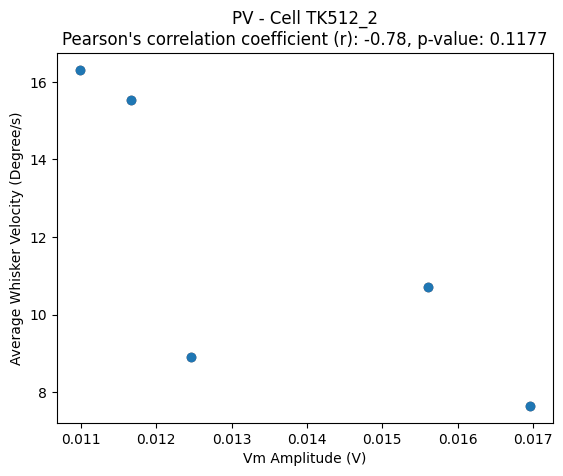

In [59]:
df_pv = active_touch_df[active_touch_df['Cell_Type'] == 'PV']

colors = list(mcolors.TABLEAU_COLORS.values())  # Using Tableau colors for distinction

for idx, cell_id in enumerate(np.unique(df_pv.Cell_ID)):
    cell_df = df_pv[df_pv.Cell_ID==cell_id]
    cell_df = cell_df[cell_df.Cell_Type=='PV']
    color_index = 0
    wp_amp_tot = []
    vm_amp_tot = []
    for cell in range(len(cell_df)):
        #print(cell)
        event_times = cell_df['Sweep_ActiveContactTimes'].values[cell]
        if np.isnan(event_times).any():
            continue
        sr_vm = cell_df['Sweep_MembranePotential_SamplingRate'].values[cell] #[0] to get the content of the array
        membrane_potential = cell_df['Sweep_MembranePotential'].values[cell]
        ap_vm_deriv_thresh = cell_df['Cell_APThreshold_Slope'].values[cell]
            
        # Template: extract whisker angle and sampling rate of whisker video data
        wp = cell_df['Sweep_WhiskerAngle'].values[cell]
        sr_wp = cell_df['Sweep_WhiskerAngle_SamplingRate'].values[cell]
        wp_time = np.arange(len(wp))/sr_wp
        vm_time = np.arange(len(membrane_potential))/sr_vm

        #now detect and cut out APs.
        ap_params = Function_Detect_APs(membrane_potential, sr_vm, ap_vm_deriv_thresh)         
                    
        ap_duration = []
        if (ap_params.any()):
            ap_thresh_times = ap_params[:,0]
            ap_thresh_vm = ap_params[:,1]
            ap_peak_times = ap_params[:,2]
            ap_peak_vm = ap_params[:,3]
            ap_duration = ap_params[:,5] #check for no-APs (cells with no spikes in ALL trials:EXC5,16 FR=0, AP_dur=np.nan)
                #... if so, cut-out individual APs to keep subthreshold Vm only
            vm_sub = Function_CutAPs(membrane_potential, sr_vm, ap_peak_times, ap_thresh_times)
        else:
            vm_sub = membrane_potential.copy()

        #we keep only the events that are far away from each other (more than min-iti)
        good_event_times = []
        #print(len(event_times))
        #print(event_times)

        if type(event_times[0]) == np.float64:
            good_event_times.append(event_times)
        else: 
            for i in range(len(event_times)):
                if i == len(event_times)-1:
                    good_event_times.append(event_times[i])
                elif event_times[i+1][0] - event_times[i][1] > min_iti:
                    good_event_times.append(event_times[i])

        for start, end in good_event_times:
            if start > end:
                continue
            # Convert the start and end time of the active touch to indices
            start_index_vm = np.searchsorted(vm_time, start)
            end_index_vm = np.searchsorted(vm_time, end+post_window)
            start_index_wp = np.searchsorted(wp_time, max(start-pre_window,0))
            end_index_wp = np.searchsorted(wp_time, end)

            amp_wp = max(wp[start_index_wp:end_index_wp])- min(wp[start_index_wp:end_index_wp])
            wp_amp_tot.append(amp_wp)

            amp_vm = max(vm_sub[start_index_vm:end_index_vm])- min(vm_sub[start_index_vm:end_index_vm])
            vm_amp_tot.append(amp_vm)
            color_index += 1
            
    correlation_coefficient, p_value = pearsonr(vm_amp_tot, wp_amp_tot)
    plt.scatter(vm_amp_tot, wp_amp_tot, color=colors[color_index % len(colors)], label=f'Trial {trial}')
    plt.scatter(vm_amp_tot,wp_amp_tot)
    plt.xlabel('Vm Amplitude (V)')
    plt.ylabel('Average Whisker Velocity (Degree/s)')
    plt.title(f'PV - Cell {cell_id}\nPearson\'s correlation coefficient (r): {correlation_coefficient:.2f}, p-value: {p_value:.4f}')
    plt.show()
            


In [68]:


# Initialize lists to store amplitude and duration data
amplitude_data = []
duration_data = []
df_one_cell = df[0]
# Iterate over each inter-trial interval
for start, end in events:
    if start > end:
        continue

    # Convert the start and end time of the active touch to indices
    start_index_vm = np.searchsorted(vm_time, start)
    end_index_vm = np.searchsorted(vm_time, end + post_window)

    # Extract the Vm segment for the current interval
    vm_segment = vm_sub[start_index_vm:end_index_vm]

    # Calculate the amplitude (max - min) of membrane potential
    amp_vm = np.max(vm_segment) - np.min(vm_segment)

    # Calculate the time duration of the interval
    duration = end - start

    # Store amplitude and duration data
    amplitude_data.append(amp_vm)
    duration_data.append(duration)

# Plot amplitude against time duration
plt.scatter(duration_data, amplitude_data, color=colors[0], label=f'Cell {cell_id}')
plt.xlabel('Time Duration of Intervals')
plt.ylabel('Membrane Potential Amplitude')
plt.title(f'Membrane Potential Amplitude vs Time Duration (Cell {cell_id})')
plt.legend()
plt.show()

KeyError: 0

In [119]:
df_one_cell = active_touch_df[active_touch_df['Cell_Type'] == 'EXC']
cell_df = df_one_cell[df_one_cell.Cell_ID=='JP902_1']
active_contact_times_list = cell_df['Sweep_ActiveContactTimes'].tolist()
membrane_potential_list = cell_df['Sweep_MembranePotential'].tolist()
sampling_rate_one_cell = cell_df['Sweep_MembranePotential_SamplingRate'].tolist()
time_points_total = []

for j, membrane_pot in enumerate(membrane_potential_list):
    time_points_one_cell = [i / sampling_rate_one_cell[j] for i in range(len(membrane_potential))]
    time_points_total.append(time_points_one_cell)




In [120]:
# Initialize lists to store amplitude and duration data between intervals for each trial
trial_amplitude_data = []
trial_duration_data = []

# Iterate over trials
for trial in range(len(membrane_potential_list)):  # Assuming 4 trials
    # Initialize lists to store amplitude and duration data between intervals for the current trial
    amplitude_data = []
    duration_data = []

    # Iterate over consecutive active touch intervals
    for i in range(len(active_contact_times_list[trial]) - 1):
        start_current, end_current = active_contact_times_list[trial][i]
        start_next, _ = active_contact_times_list[trial][i + 1]

        # Calculate the time duration between intervals
        duration = start_next - end_current

        # Skip intervals with negative or zero duration
        if duration <= 0:
            continue

        # Convert the start and end time of the interval to indices
        start_index = np.searchsorted(time_points_total[trial], start_current)
        end_index = np.searchsorted(time_points_total[trial], end_current) #+ post_window)

        # Extract the membrane potential segment between intervals
        membrane_potential_segment = membrane_potential_list[trial][start_index:end_index]

        # Check if the segment is not empty
        if len(membrane_potential_segment) > 0:
            # Calculate the amplitude (max - min) of membrane potential
            amp_vm = np.max(membrane_potential_segment) - np.min(membrane_potential_segment)

            # Store amplitude and duration data for the current trial
            amplitude_data.append(amp_vm)
            duration_data.append(duration)

    # Store amplitude and duration data for the current trial
    trial_amplitude_data.append(amplitude_data)
    trial_duration_data.append(duration_data)

# Now, trial_amplitude_data and trial_duration_data contain lists of amplitudes and durations between intervals for each trial.

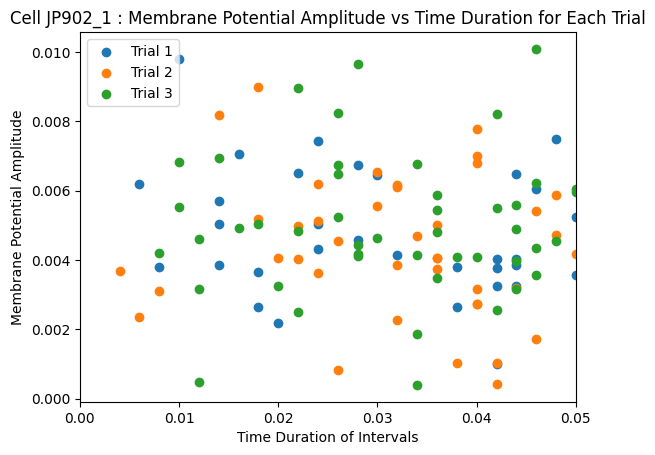

In [125]:
# Iterate over trials and plot each trial's data
for trial in range(len(membrane_potential_list)):  # Assuming 4 trials
    amplitude_data = trial_amplitude_data[trial]
    duration_data = trial_duration_data[trial]

    # Plot amplitude against duration for the current trial
    plt.scatter(duration_data, amplitude_data, label=f'Trial {trial + 1}')

# Add labels and legend
plt.xlim(0, 0.05)

plt.xlabel('Time Duration of Intervals')
plt.ylabel('Membrane Potential Amplitude')
plt.title('Cell JP902_1 : Membrane Potential Amplitude vs Time Duration for Each Trial')
plt.legend()
plt.show()